<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Kaggle Submission Template</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<h3>The Purpose of the Notebook</h3><br>
This Notebook is organized as a template for submitting on Kaggle. It will output a .csv file that can be submitted via Kaggle.<br><br>
Remember that you also need to provide an analysis alongside your model building via the assignment link on the course page. Start by conducting your analysis and then copy/paste relevant code to this template (missing value imputation, feature engineering, etc.). Please do not submit this template as your analysis (many of the technical steps are not necessary for the analysis). Finally, on the course page, make sure to submit your analysis and model development as one document in two formats (Jupyter Notebook and a .txt file).
<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Reminder: Model Analysis Tips</h3><br>
<strong>How fit should a model be?</strong><br>
As a general heuristic, if the training and testing scores are within 0.05 of each other, the model has not been overfit. Don't worry if the testing score ends up higher than the training score. Some sources claim that in such situations a model is underfit, but this is a general misconception that is beyond the scope of this course. For this course, long as the training and testing scores are within 0.05 of each other, the model is good to go.
<br><br>

<strong>Which model should I choose?</strong><br>
All models have their own benefits and drawbacks. Thus, it is important to test out more than one and to also explore their <a href="https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors">documentation</a>.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Imports and Data Check</h2>

In [1129]:
## importing libraries ##

# for this template submission
import numpy             as np                       # mathematical essentials
import pandas            as pd                       # data science essentials
import sklearn.linear_model                          # linear models
from sklearn.model_selection import train_test_split # train/test split


#!###############################!#
#!# import additional libraries #!#
#!###############################!#
#_____
import seaborn as sns # enhanced graphical output
import matplotlib.pyplot as plt # essential graphical output
import statsmodels.formula.api as smf # regression modeling

from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler  # standard scaler

from sklearn.tree import DecisionTreeRegressor         # regression trees
from sklearn.tree import plot_tree     
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning

# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<br>

In [1130]:
## importing data ##

# reading modeling data into Python
modeling_data = './datasets/chicago_training_data.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

<br>

In [1131]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


<br>

In [1132]:
# checking available features
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

<br>

In [1133]:
#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = 'RENTALS'
df_full_mv = df_full

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Data Preparation</h2><br>
Complete the following steps to prepare for model building. Note that you may add or remove steps as you see fit. Please see the assignment description for details on what steps are required for this project.
<br><br>
<h3>Base Modeling</h3>

In [1134]:
## Base Modeling ##

# INFOrmation about each variable
df_full.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateHour                2184 non-null   object 
 1   Temperature(F)          2184 non-null   int64  
 2   Humidity(%)             2184 non-null   int64  
 3   Wind speed (mph)        2184 non-null   float64
 4   Visibility(miles)       2108 non-null   float64
 5   DewPointTemperature(F)  2117 non-null   float64
 6   Rainfall(in)            2184 non-null   float64
 7   Snowfall(in)            2184 non-null   float64
 8   SolarRadiation(MJ/m2)   2078 non-null   float64
 9   Holiday                 2184 non-null   object 
 10  FunctioningDay          2184 non-null   object 
 11  RENTALS                 1638 non-null   float64
 12  set                     2184 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 238.9+ KB


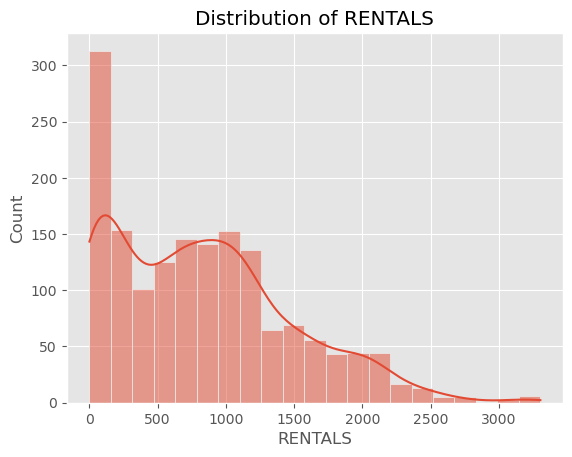

In [1135]:
# developing a histogram using HISTPLOT
sns.histplot(data  = df_train,
         x     = "RENTALS",
         kde   = True)


# title and axis labels
plt.title(label   = "Distribution of RENTALS")
plt.xlabel(xlabel = "RENTALS") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

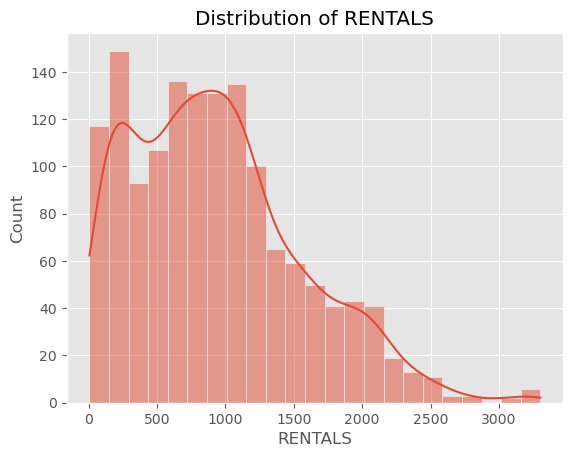

In [1136]:
data_0 = df_train[df_train.FunctioningDay == 'Yes']
sns.histplot(data  = data_0,
         x     = "RENTALS",
         kde   = True)

# title and axis labels
plt.title(label   = "Distribution of RENTALS")
plt.xlabel(xlabel = "RENTALS") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

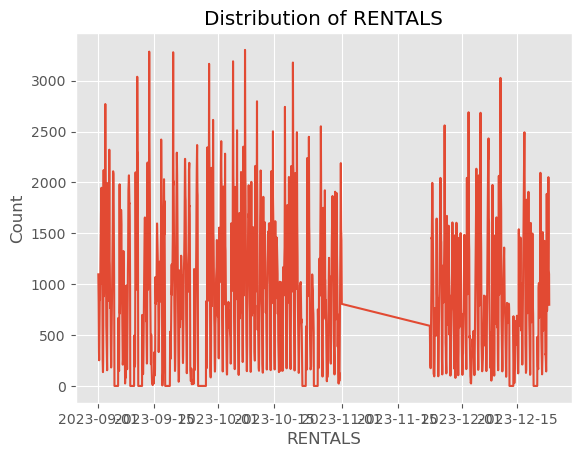

In [1137]:
sns.lineplot(data = df_train,
            x = 'DateHour',
            y ='RENTALS')
# title and axis labels
plt.title(label   = "Distribution of RENTALS")
plt.xlabel(xlabel = "RENTALS") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

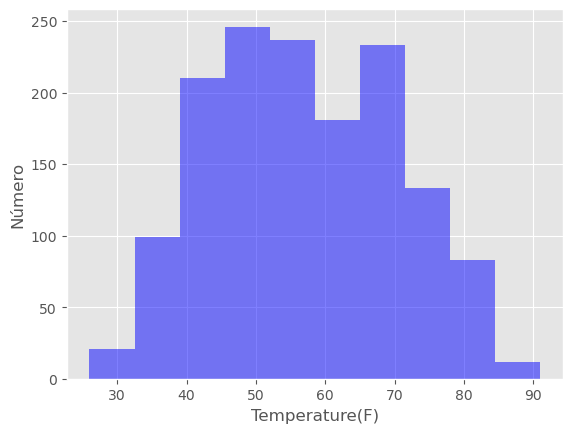

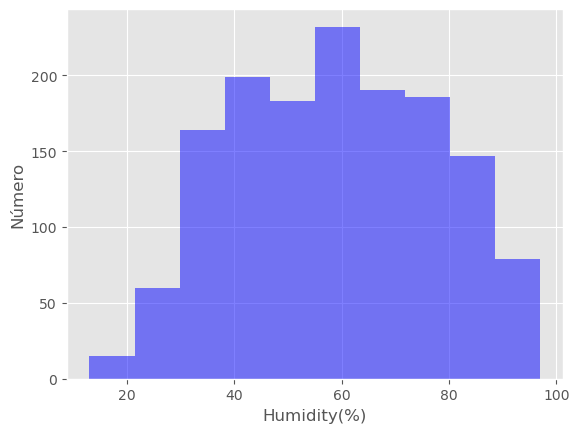

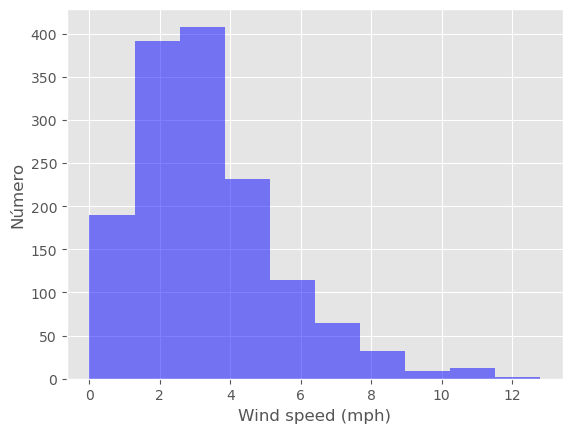

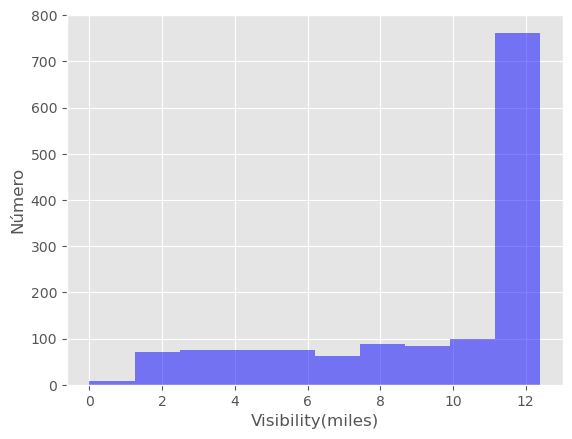

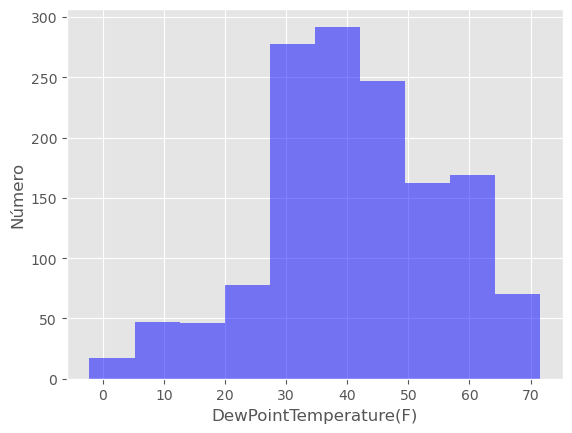

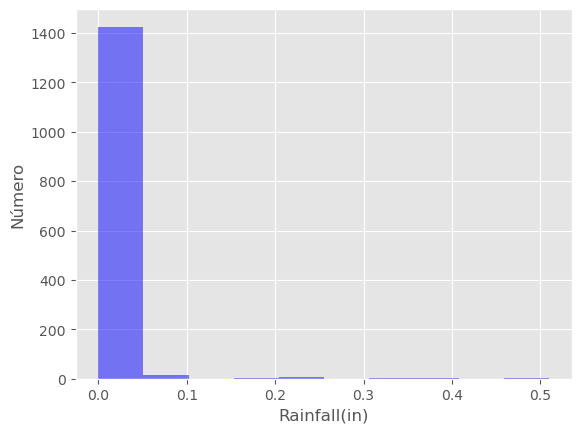

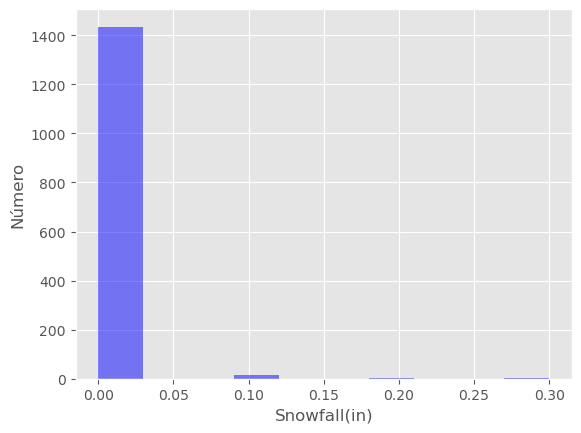

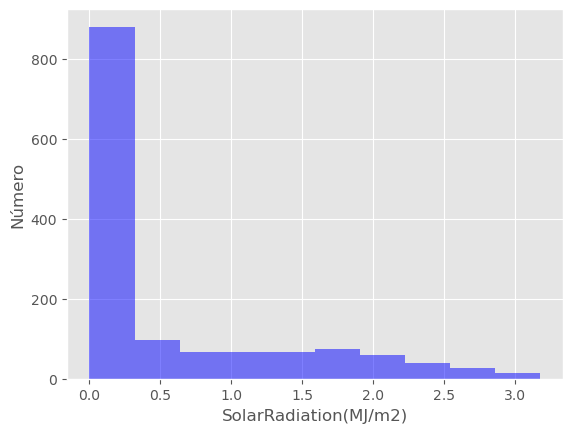

In [1138]:
inputs_num = ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)']
plt.style.use('ggplot')
num_bins = 10
data_0 = df_train[df_train.FunctioningDay == 'Yes']

for i in inputs_num:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

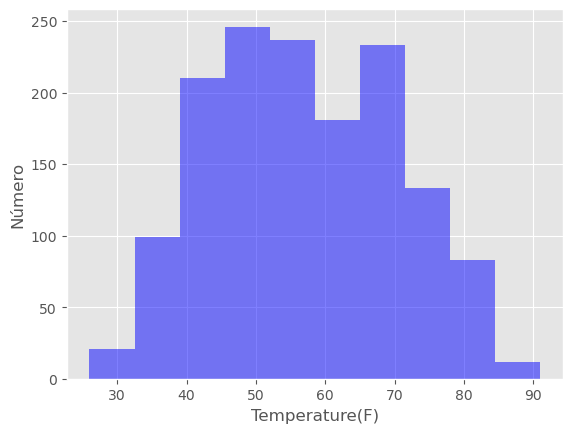

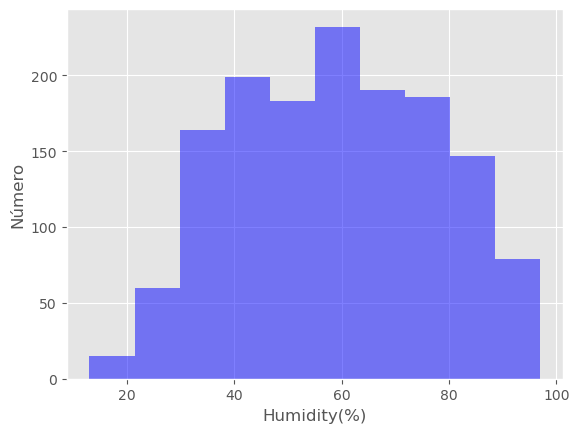

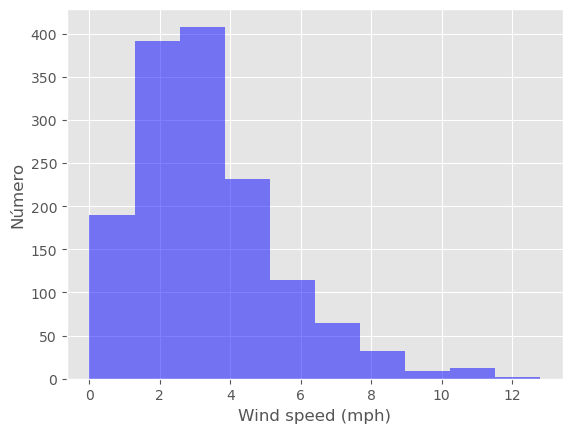

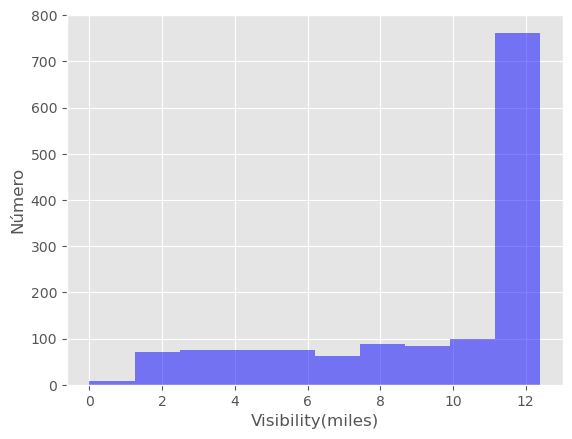

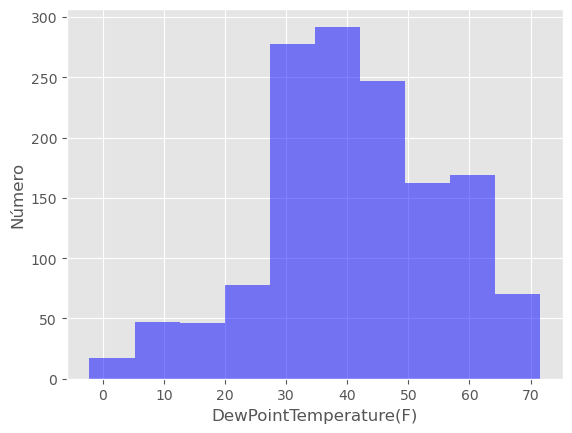

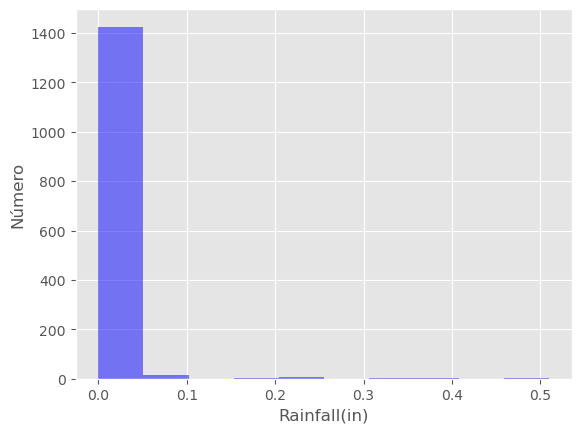

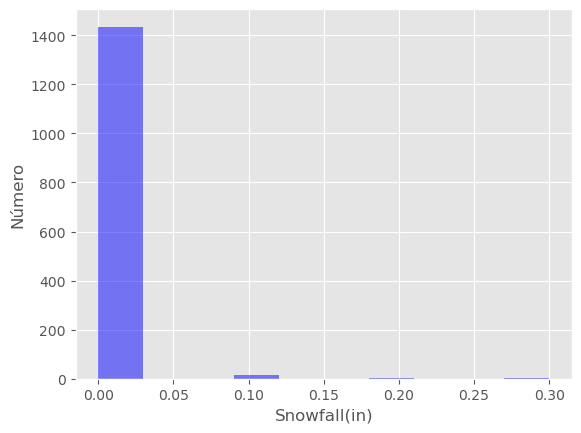

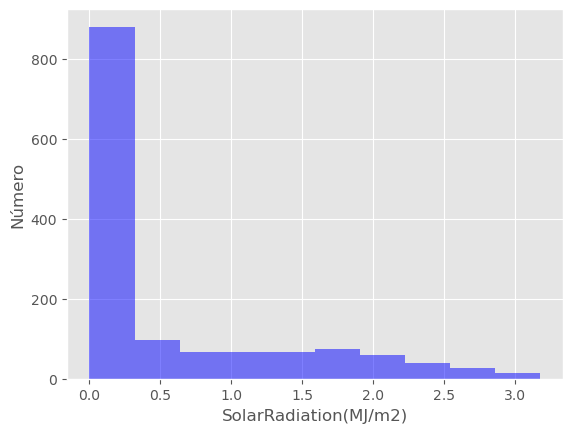

In [1139]:
inputs_num = ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)']
plt.style.use('ggplot')
num_bins = 10
data_1 = df_full[df_full.FunctioningDay == 'Yes']

for i in inputs_num:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

In [1140]:
# descriptive statistics for numeric data
df_full_stats = data_0.iloc[ :, 1: ].describe(include = 'number').round(decimals = 2)
df_full_stats

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,1455.00,1455.00,1455.00,1405.00,1406.00,1455.00,1455.00,1390.00,1455.00
mean,56.79,58.76,3.34,9.58,41.16,0.00,0.00,0.54,932.31
std,13.24,18.92,2.05,3.55,14.54,0.03,0.02,0.81,624.25
min,26.00,13.00,0.00,0.00,-2.20,0.00,0.00,0.00,5.00
25%,46.00,44.00,1.90,7.10,32.20,0.00,0.00,0.00,442.00
50%,56.00,58.00,2.90,11.70,40.70,0.00,0.00,0.00,862.00
75%,67.00,74.00,4.50,12.40,50.85,0.00,0.00,0.95,1264.50
max,91.00,97.00,12.80,12.40,71.60,0.51,0.30,3.18,3303.00


In [1141]:
# developing a correlation matrix
df_full_corr = data_0.corr(method = 'pearson',numeric_only = True)
df_full_corr

# filtering results to show correlations with Sale_Price
df_full_corr.loc[ : , "RENTALS"].round(decimals = 2).sort_values(ascending = False)

RENTALS                   1.00
Temperature(F)            0.44
SolarRadiation(MJ/m2)     0.25
Wind speed (mph)          0.24
DewPointTemperature(F)    0.11
Visibility(miles)         0.01
Snowfall(in)             -0.11
Rainfall(in)             -0.17
Humidity(%)              -0.44
Name: RENTALS, dtype: float64

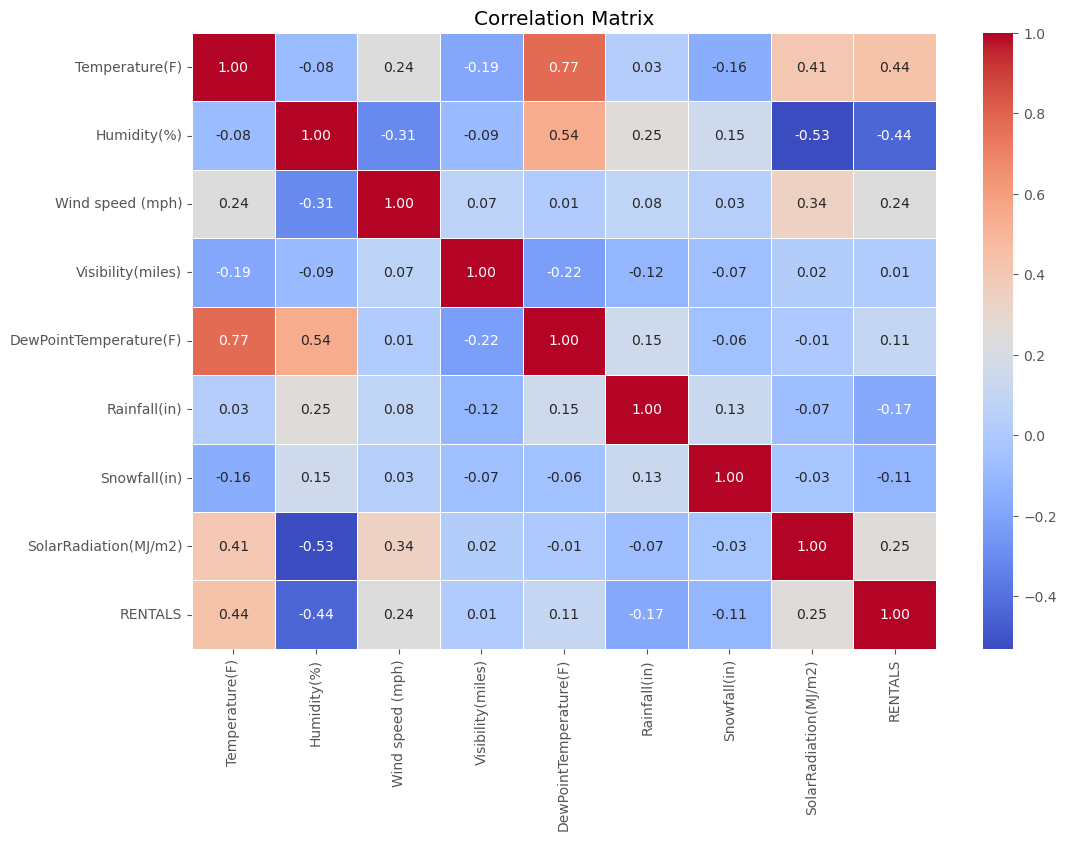

In [1142]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_full_corr, 
            annot=True, fmt=".2f", 
            cmap='coolwarm', 
            cbar=True, 
            linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

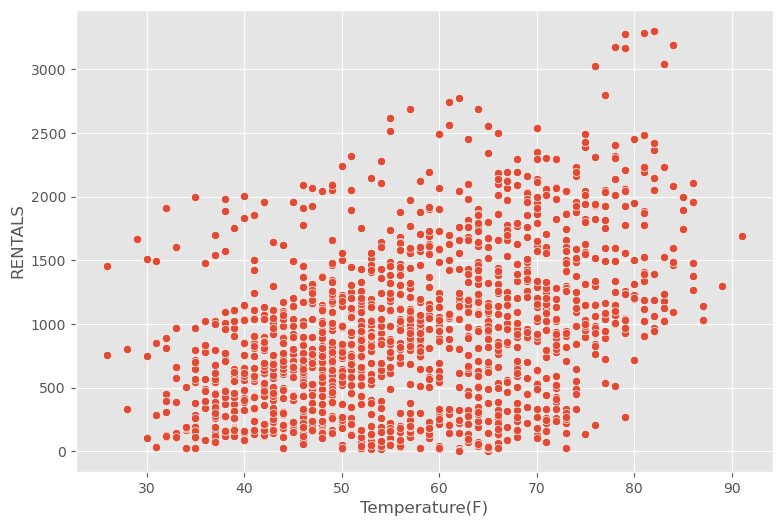

In [1143]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = "Temperature(F)",
         y    = "RENTALS",
         data = data_0)


# SHOWing the results
plt.show()

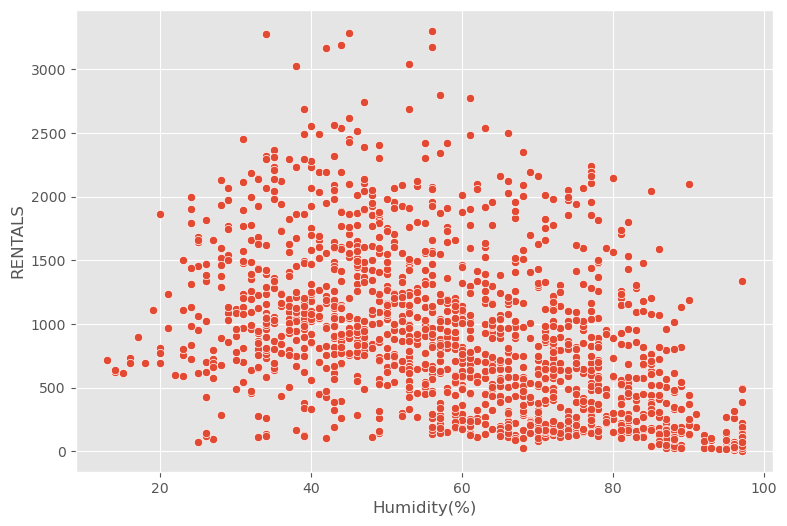

In [1144]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = "Humidity(%)",
         y    = "RENTALS",
         data = data_0)


# SHOWing the results
plt.show()

# Analysis Introduction
In the burgeoning bike-sharing industry, understanding factors that drive rental demand is crucial for planning and operational efficiency. This analysis leverages machine learning to predict daily bike rentals in a major US city, using a dataset that encompasses weather conditions, temporal factors, and operational statuses. Initial exploratory data analysis (EDA) reveals intricate patterns and relationships, guiding subsequent data preprocessing steps to enhance model performance. Feature engineering further refines the dataset, introducing new variables aimed at encapsulating underlying trends and seasonalities. A comparative evaluation of several regression models, adhering to specified constraints, culminates in the selection of an optimal model based on predictive accuracy and interpretability.

<br><h3>Missing Value Analysis and Imputation</h3>

In [1145]:
## Missing Value Imputation ##
df_full.isnull().describe()
df_full.isnull().sum(axis = 0)


DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)          76
DewPointTemperature(F)     67
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)     106
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

In [1146]:
df_full.isnull().mean(axis = 0)

DateHour                  0.000000
Temperature(F)            0.000000
Humidity(%)               0.000000
Wind speed (mph)          0.000000
Visibility(miles)         0.034799
DewPointTemperature(F)    0.030678
Rainfall(in)              0.000000
Snowfall(in)              0.000000
SolarRadiation(MJ/m2)     0.048535
Holiday                   0.000000
FunctioningDay            0.000000
RENTALS                   0.250000
set                       0.000000
dtype: float64

In [1147]:
# looping to flag features with missing values
for col in df_full:

    # creating columns with 1s if missing and 0 if not
    if df_full[col].isnull().astype(int).sum() > 0:
        df_full['m_'+col] = df_full[col].isnull().astype(int)

In [1148]:
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set', 'm_Visibility(miles)', 'm_DewPointTemperature(F)', 'm_SolarRadiation(MJ/m2)', 'm_RENTALS'], dtype='object')

In [1149]:
df_full = df_full.drop(columns=['m_RENTALS'])
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set', 'm_Visibility(miles)', 'm_DewPointTemperature(F)', 'm_SolarRadiation(MJ/m2)'], dtype='object')

In [1150]:
# checking results - summing missing value flags
df_full[ ['m_Visibility(miles)', 'm_DewPointTemperature(F)', 'm_SolarRadiation(MJ/m2)'] ].sum(axis = 0)

m_Visibility(miles)          76
m_DewPointTemperature(F)     67
m_SolarRadiation(MJ/m2)     106
dtype: int64

In [1151]:
# subsetting for mv features
mv_flag_check = df_full[ ['Visibility(miles)'     , 'm_Visibility(miles)',
                          'DewPointTemperature(F)' , 'm_DewPointTemperature(F)',
                          'SolarRadiation(MJ/m2)', 'm_SolarRadiation(MJ/m2)'] ]


# checking results - feature comparison
mv_flag_check.sort_values(by = ['m_Visibility(miles)', 'm_DewPointTemperature(F)', 'm_SolarRadiation(MJ/m2)'],
                          ascending = False).head(n = 10)

,Visibility(miles),m_Visibility(miles),DewPointTemperature(F),m_DewPointTemperature(F),SolarRadiation(MJ/m2),m_SolarRadiation(MJ/m2)
ID,,,,,,
mb_004,NaN,1,NaN,1,0.00,0
mb_006,NaN,1,NaN,1,0.00,0
mb_1926,NaN,1,34.0,0,NaN,1
mb_2046,NaN,1,34.2,0,NaN,1
mb_2041,NaN,1,36.0,0,NaN,1
mb_2048,NaN,1,33.3,0,NaN,1
mb_2047,NaN,1,33.4,0,NaN,1
mb_1330,NaN,1,35.2,0,1.01,0
mb_1099,NaN,1,67.3,0,0.17,0


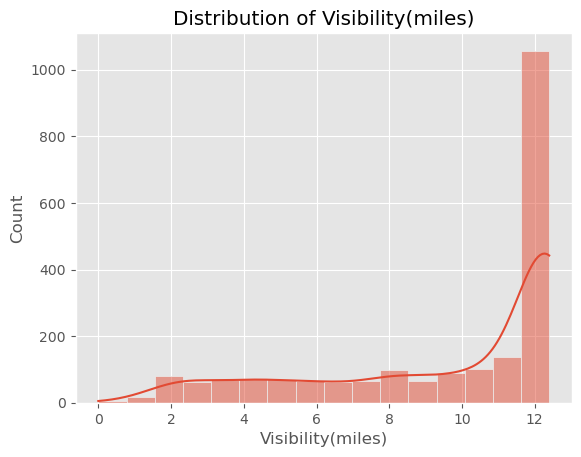

In [1152]:
#Missing values of VISIBILITY

# plotting 'Visibility(miles)'
sns.histplot(x = 'Visibility(miles)',
            data = df_full,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of Visibility(miles)')
plt.xlabel(xlabel = 'Visibility(miles)')
plt.ylabel(ylabel = 'Count')


# displaying the plot
plt.show()

In [1153]:
fill1 = df_full['Visibility(miles)'].median()
# imputing Visibility(miles)
df_full['Visibility(miles)'].fillna(value   = fill1,
                                    inplace = True)

In [1154]:
#Check the correct imputation
df_full[ ['Visibility(miles)', 'm_Visibility(miles)'] ][df_full['m_Visibility(miles)'] == 1].head(n = 10)

,Visibility(miles),m_Visibility(miles)
ID,,
mb_1330,11.7,1
mb_1099,11.7,1
mb_2049,11.7,1
mb_1926,11.7,1
mb_423,11.7,1
mb_570,11.7,1
mb_262,11.7,1
mb_1346,11.7,1
mb_1378,11.7,1


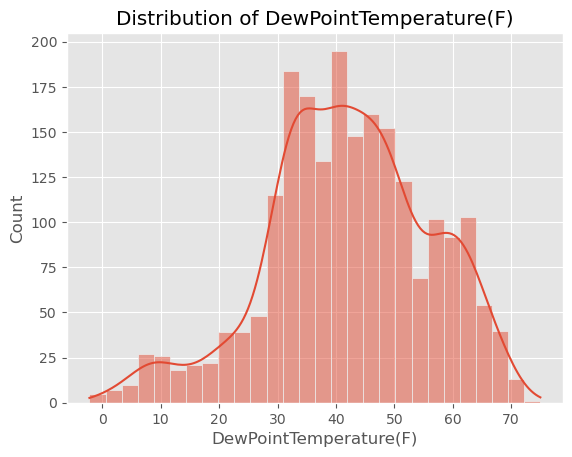

In [1155]:
# DewPointTemperature
df_full[['DewPointTemperature(F)' , 'm_DewPointTemperature(F)']].describe()

# plotting 'DewPointTemperature'
sns.histplot(x = 'DewPointTemperature(F)',
            data = df_full,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of DewPointTemperature(F)')
plt.xlabel(xlabel = 'DewPointTemperature(F)')
plt.ylabel(ylabel = 'Count')


# displaying the plot
plt.show()

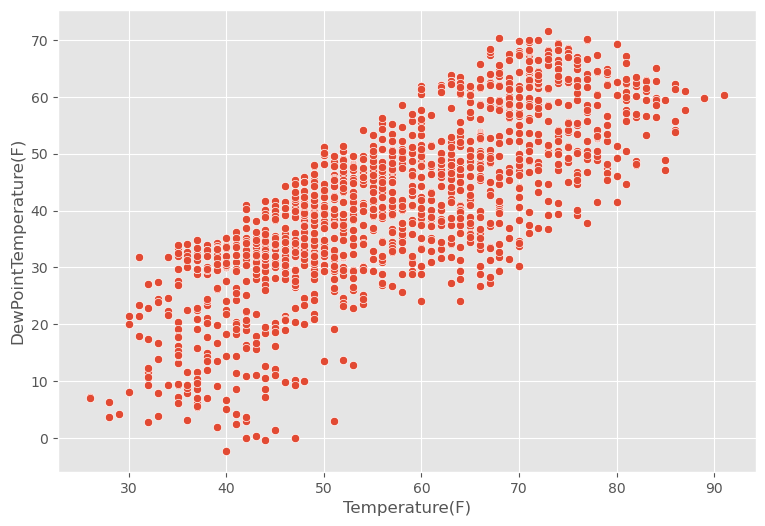

In [1156]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = "Temperature(F)",
         y    = "DewPointTemperature(F)",
         data = data_0)


# SHOWing the results
plt.show()

In [1157]:
#Converting F to C
df_full['Temperature(C)']=(df_full['Temperature(F)']-32)*5/9

#Using the DewPoint Temperature Formula to estimate the real value in F
fill2=((df_full['Temperature(C)']-((100-df_full['Humidity(%)'])/5))*9/5)+32

#Imputing missing values
df_full['DewPointTemperature(F)'].fillna(value=fill2,
                          inplace = True)
#Delete the new column created
df_full.drop(columns=['Temperature(C)'], inplace=True)

In [1158]:
#Check the correct imputation
df_full[ ['DewPointTemperature(F)', 'm_DewPointTemperature(F)','Temperature(F)','Humidity(%)'] ][df_full['m_DewPointTemperature(F)'] == 1].head(n = 10)

,DewPointTemperature(F),m_DewPointTemperature(F),Temperature(F),Humidity(%)
ID,,,,
mb_367,62.24,1,68,84
mb_144,32.16,1,48,56
mb_1474,34.16,1,50,56
mb_2147,19.36,1,37,51
mb_1557,38.36,1,56,51
mb_1710,10.72,1,37,27
mb_1287,26.32,1,49,37
mb_815,59.60,1,74,60
mb_072,32.68,1,46,63


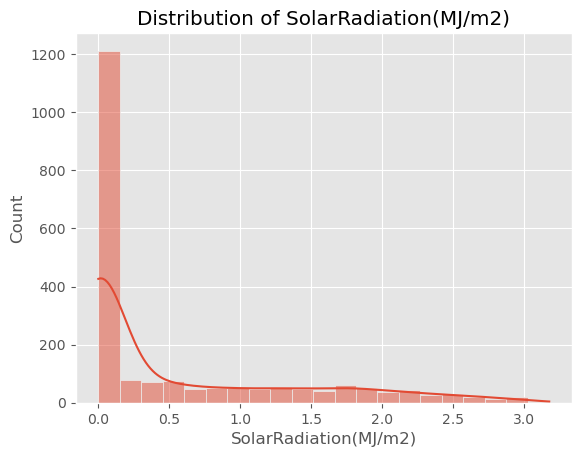

In [1159]:
# plotting 'SolarRadiation(MJ/m2)'
sns.histplot(x = 'SolarRadiation(MJ/m2)',
            data = df_full,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of SolarRadiation(MJ/m2)')
plt.xlabel(xlabel = 'SolarRadiation(MJ/m2)')
plt.ylabel(ylabel = 'Count')


# displaying the plot
plt.show()

In [1160]:
# imputing SolarRadiation(MJ/m2)
df_full['SolarRadiation(MJ/m2)'].fillna(value   = 0   ,
                               inplace = True)

In [1161]:
df_full[ ['SolarRadiation(MJ/m2)', 'm_SolarRadiation(MJ/m2)'] ][df_full['m_SolarRadiation(MJ/m2)'] == 1].head(n = 10)

,SolarRadiation(MJ/m2),m_SolarRadiation(MJ/m2)
ID,,
mb_079,0.0,1
mb_1894,0.0,1
mb_1558,0.0,1
mb_2036,0.0,1
mb_1926,0.0,1
mb_198,0.0,1
mb_1562,0.0,1
mb_1566,0.0,1
mb_1557,0.0,1


In [1162]:
# making sure all missing values have been taken care of
df_full.isnull().sum(axis = 0)

DateHour                      0
Temperature(F)                0
Humidity(%)                   0
Wind speed (mph)              0
Visibility(miles)             0
DewPointTemperature(F)        0
Rainfall(in)                  0
Snowfall(in)                  0
SolarRadiation(MJ/m2)         0
Holiday                       0
FunctioningDay                0
RENTALS                     546
set                           0
m_Visibility(miles)           0
m_DewPointTemperature(F)      0
m_SolarRadiation(MJ/m2)       0
dtype: int64

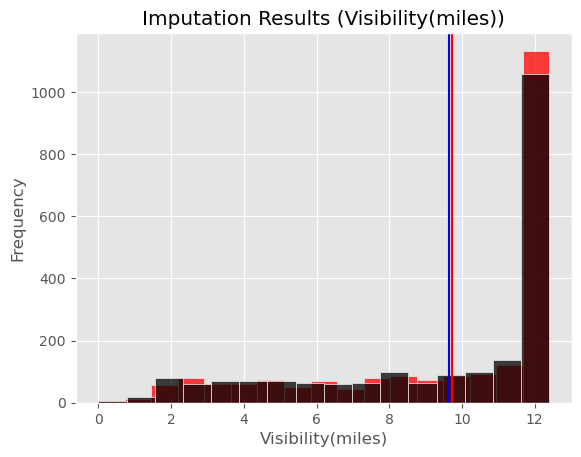

In [1163]:
#######################
## Visibility(miles) ##
#######################
# scatterplot AFTER missing values
sns.histplot(data  = df_full,
             x     = 'Visibility(miles)',
             fill  = True,
             color = "red")


# scatterplot BEFORE missing values
sns.histplot(data  = df_full_mv,
             x     = 'Visibility(miles)',
             fill  = True,
             color = 'black')


# mean lines
plt.axvline(df_full['Visibility(miles)'].mean()   , color = "red")
plt.axvline(df_full_mv['Visibility(miles)'].mean(), color = "blue")


# labels and rendering
plt.title (label  = "Imputation Results (Visibility(miles))")
plt.xlabel(xlabel = "Visibility(miles)")
plt.ylabel(ylabel = "Frequency")
plt.show()

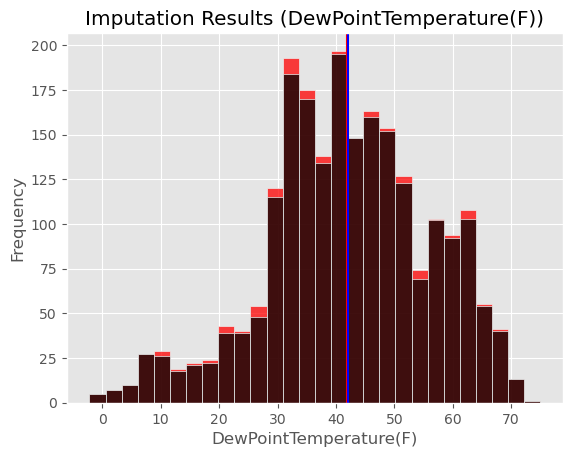

In [1164]:
############################
## DewPointTemperature(F) ##
############################
# scatterplot AFTER missing values
sns.histplot(data  = df_full,
             x     = 'DewPointTemperature(F)',
             fill  = True,
             color = "red")


# scatterplot BEFORE missing values
sns.histplot(data  = df_full_mv,
             x     = 'DewPointTemperature(F)',
             fill  = True,
             color = 'black')


# mean lines
plt.axvline(df_full['DewPointTemperature(F)'].mean()   , color = "red")
plt.axvline(df_full_mv['DewPointTemperature(F)'].mean(), color = "blue")


# labels and rendering
plt.title (label  = "Imputation Results (DewPointTemperature(F))")
plt.xlabel(xlabel = "DewPointTemperature(F)")
plt.ylabel(ylabel = "Frequency")
plt.show()

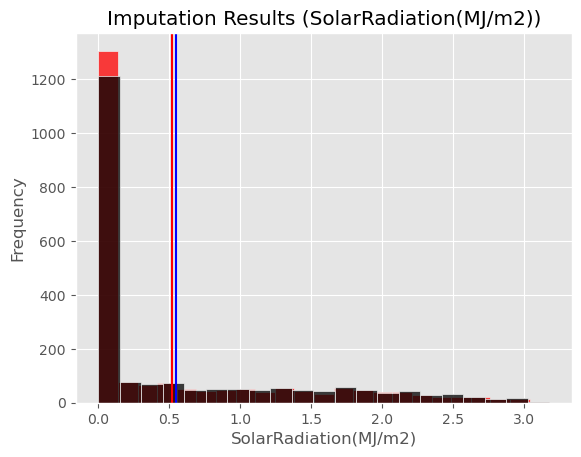

In [1165]:
###########################
## SolarRadiation(MJ/m2) ##
###########################
# scatterplot AFTER missing values
sns.histplot(data  = df_full,
             x     = 'SolarRadiation(MJ/m2)',
             fill  = True,
             color = "red")


# scatterplot BEFORE missing values
sns.histplot(data  = df_full_mv,
             x     = 'SolarRadiation(MJ/m2)',
             fill  = True,
             color = 'black')


# mean lines
plt.axvline(df_full['SolarRadiation(MJ/m2)'].mean()   , color = "red")
plt.axvline(df_full_mv['SolarRadiation(MJ/m2)'].mean(), color = "blue")


# labels and rendering
plt.title (label  = "Imputation Results (SolarRadiation(MJ/m2))")
plt.xlabel(xlabel = "SolarRadiation(MJ/m2)")
plt.ylabel(ylabel = "Frequency")
plt.show()

# Exploratory Data Analysis and Data Preprocessing

The exploratory data analysis commenced with a review of descriptive statistics, uncovering a wide range of rental counts and diverse weather conditions. Histograms of rental counts illustrated a right-skewed distribution, suggesting variability in daily usage patterns. Correlation analysis highlighted potential predictors, such as temperature and humidity, albeit with varying degrees of association. Notably, the presence of missing values in visibility, dew point temperature, and solar radiation necessitated thoughtful imputation strategies. The preprocessing phase also addressed categorical variables through one-hot encoding, ensuring compatibility with machine learning algorithms. Standardization of continuous variables was paramount to eliminate scale discrepancies, thereby facilitating more balanced contributions across features.

<br><h3>Transformations</h3>

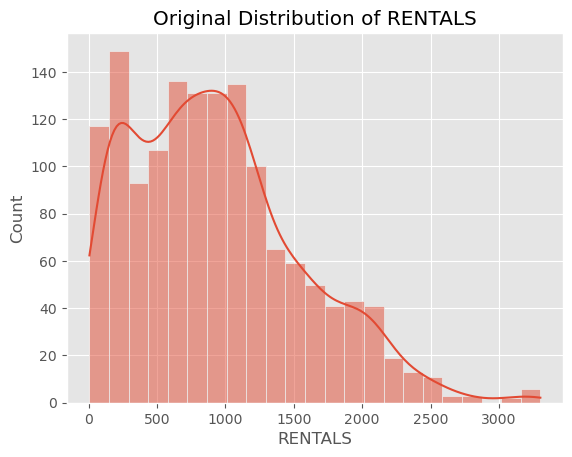

In [1166]:
## Transformations ##

# developing a histogram using HISTPLOT
sns.histplot(data   = df_full[df_full['FunctioningDay']=='Yes'],
             x      = 'RENTALS',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of RENTALS")
plt.xlabel(xlabel = "RENTALS") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [1167]:
# log transforming Sale_Price and saving it to the dataset
df_full['log_RENTALS'] = np.log1p(df_full['RENTALS'])

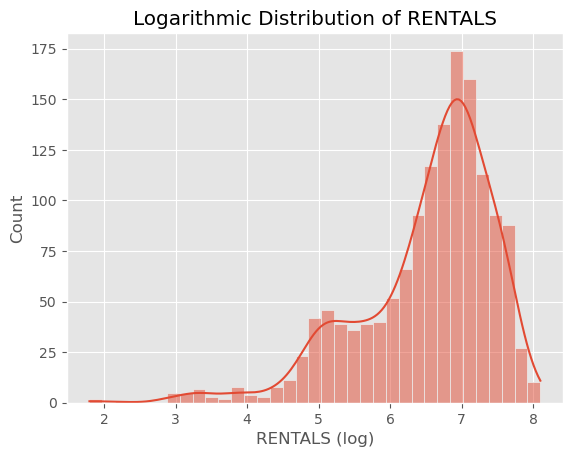

In [1168]:
# developing a histogram using HISTPLOT
sns.histplot(data   = df_full[df_full['FunctioningDay']=='Yes'],
             x      = 'log_RENTALS',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of RENTALS")
plt.xlabel(xlabel = "RENTALS (log)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [1169]:
df_full.skew(axis = 0, numeric_only = True).round(decimals = 2)

Temperature(F)               0.04
Humidity(%)                  0.02
Wind speed (mph)             1.04
Visibility(miles)           -1.07
DewPointTemperature(F)      -0.32
Rainfall(in)                11.91
Snowfall(in)                11.45
SolarRadiation(MJ/m2)        1.42
RENTALS                      0.72
m_Visibility(miles)          5.08
m_DewPointTemperature(F)     5.45
m_SolarRadiation(MJ/m2)      4.20
log_RENTALS                 -1.83
dtype: float64

In [1170]:
df_full[df_full['FunctioningDay']=='Yes'].skew(axis = 0, numeric_only = True).round(decimals = 2)

Temperature(F)               0.10
Humidity(%)                  0.04
Wind speed (mph)             1.04
Visibility(miles)           -1.03
DewPointTemperature(F)      -0.23
Rainfall(in)                11.52
Snowfall(in)                10.77
SolarRadiation(MJ/m2)        1.43
RENTALS                      0.74
m_Visibility(miles)          5.42
m_DewPointTemperature(F)     5.18
m_SolarRadiation(MJ/m2)      4.31
log_RENTALS                 -1.28
dtype: float64

In [1171]:
# Logarithmically transform any X-features that have an absolute skewness value greater than 1.0.

df_full['log_Wind speed (mph)'] = np.log1p(df_full['Wind speed (mph)'])
df_full['log_Visibility(miles)'] = np.log1p(df_full['Visibility(miles)'])
df_full['log_Rainfall(in)'] = np.log1p(df_full['Rainfall(in)'])
df_full['log_SolarRadiation(MJ/m2)'] = np.log1p(df_full['SolarRadiation(MJ/m2)'])

In [1172]:
# skewness AFTER logarithmic transformations
df_full.loc[ : , 'log_RENTALS': ].skew(axis = 0).round(decimals = 2).sort_index(ascending = False)

log_Wind speed (mph)         -0.34
log_Visibility(miles)        -1.66
log_SolarRadiation(MJ/m2)     1.05
log_Rainfall(in)             10.66
log_RENTALS                  -1.83
dtype: float64

In [1173]:
# analyzing (Pearson) correlations
df_corr = df_full[df_full['FunctioningDay']=='Yes'].corr(method = 'pearson',numeric_only = True ).round(2)

df_corr.loc[ : , ['RENTALS', 'log_RENTALS'] ].sort_values(by = 'RENTALS',
                                                                ascending = False)

,RENTALS,log_RENTALS
RENTALS,1.00,0.87
log_RENTALS,0.87,1.00
Temperature(F),0.44,0.34
log_SolarRadiation(MJ/m2),0.27,0.33
log_Wind speed (mph),0.25,0.20
SolarRadiation(MJ/m2),0.24,0.31
Wind speed (mph),0.24,0.19
DewPointTemperature(F),0.11,-0.01
Visibility(miles),0.00,0.04
log_Visibility(miles),-0.00,0.04


<br><h3>Feature Engineering</h3>

In [1174]:
## Feature Engineering ##
# counting the number of zeroes for 
windspeed_zeroes  = len(df_full['Wind speed (mph)'][df_full['Wind speed (mph)']==0]) 
visibility_zeroes   = len(df_full['Visibility(miles)'][df_full['Visibility(miles)']==0]) 
dwpt_zeroes     = len(df_full['DewPointTemperature(F)'][df_full['DewPointTemperature(F)']==0]) 
rainfall_zeroes = len(df_full['Rainfall(in)'][df_full['Rainfall(in)']==0]) 
snowfall_zeroes    = len(df_full['Snowfall(in)'][df_full['Snowfall(in)']==0]) 
solar_zeroes  = len(df_full['SolarRadiation(MJ/m2)'][df_full['SolarRadiation(MJ/m2)']==0]) 


# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
WindSpeed     | {windspeed_zeroes}\t\t{len(df_full) - windspeed_zeroes}
Visibility    | {visibility_zeroes}\t\t{len(df_full) - visibility_zeroes}
DewPoint      | {dwpt_zeroes}\t\t{len(df_full) - dwpt_zeroes}
Rainfall      | {rainfall_zeroes}\t\t{len(df_full) - rainfall_zeroes}
Snowfall      | {snowfall_zeroes}\t\t{len(df_full) - snowfall_zeroes}
SolarRadiatio | {solar_zeroes}\t\t{len(df_full) - solar_zeroes}
""")


                 No		Yes
               ---------------------
WindSpeed     | 35		2149
Visibility    | 1		2183
DewPoint      | 1		2183
Rainfall      | 2090		94
Snowfall      | 2152		32
SolarRadiatio | 1146		1038



In [1175]:
# placeholder variables
df_full['has_SolarRadiation'] = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in df_full.iterrows():


    # Solar Radiation
    if df_full.loc[index, 'SolarRadiation(MJ/m2)'] > 0:
        df_full.loc[index, 'has_SolarRadiation'] = 1

In [1176]:
# checking results
df_full[  ['has_SolarRadiation']  ].head(n = 5)

,has_SolarRadiation
ID,
mb_1039,0
mb_1330,1
mb_551,0
mb_2103,1
mb_1430,1


In [1177]:
# developing a small correlation matrix
new_corr = df_full[df_full['FunctioningDay']=='Yes'].corr(method = 'pearson', numeric_only = True).round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
new_corr.loc[ ['has_SolarRadiation'],
              ['RENTALS', 'log_RENTALS'] ].sort_values(by = 'RENTALS',
                                                             ascending = False)

,RENTALS,log_RENTALS
has_SolarRadiation,0.39,0.36


In [1178]:
#CATEGORICAL DATA

# printing columns
print(f"""
Holiday
------
{df_full['Holiday'].value_counts()}


FunctioningDay
----------
{df_full['FunctioningDay'].value_counts()}

""")


Holiday
------
Holiday
No     2064
Yes     120
Name: count, dtype: int64


FunctioningDay
----------
FunctioningDay
Yes    1937
No      247
Name: count, dtype: int64




In [1179]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()

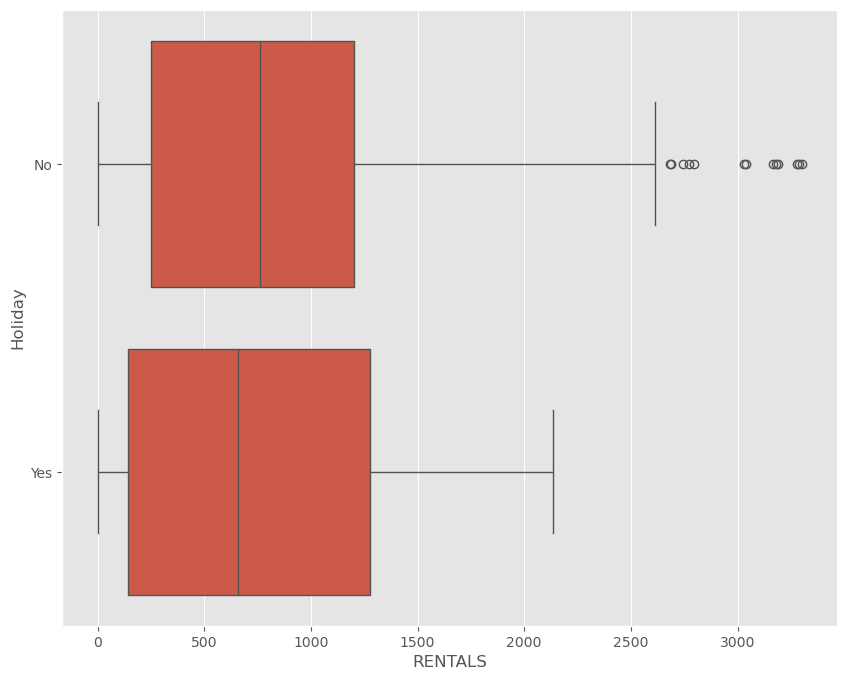

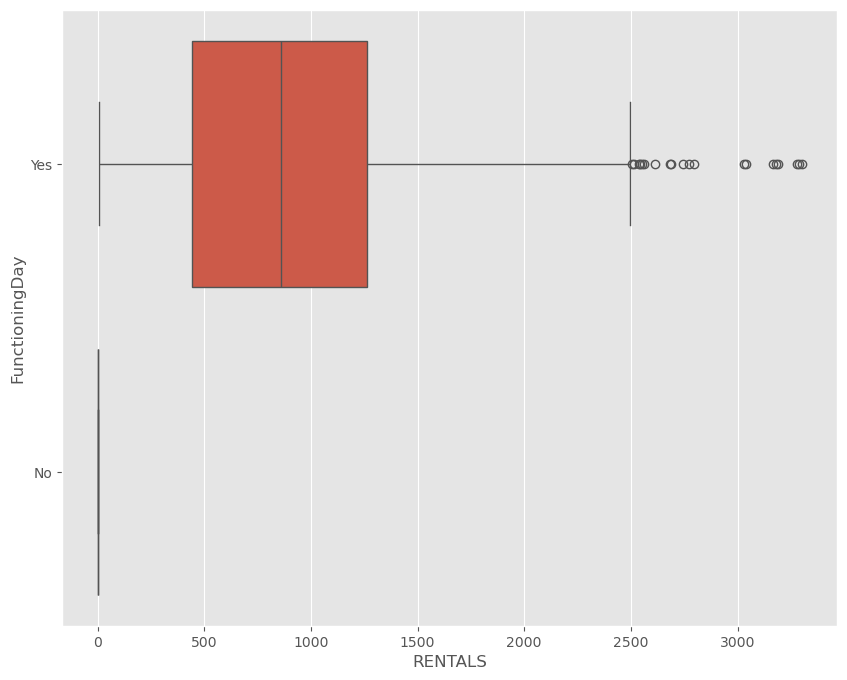

In [1180]:
# calling the function for Holiday
categorical_boxplots(response = 'RENTALS',
					 cat_var  = 'Holiday',
					 data     = df_full)


# calling the function for FunctioningDay
categorical_boxplots(response = 'RENTALS',
					 cat_var  = 'FunctioningDay',
					 data     = df_full)


In [1181]:
# one hot encoding categorical variables
one_hot_Holiday = pd.get_dummies(df_full['Holiday'], prefix = 'Holiday')
one_hot_FunctioningDay = pd.get_dummies(df_full['FunctioningDay'], prefix = 'FunctioningDay')

# dropping categorical variables after they've been encoded
df_full = df_full.drop('Holiday', axis = 1)
df_full = df_full.drop('FunctioningDay', axis = 1)

# joining codings together
df_full = df_full.join([one_hot_Holiday,one_hot_FunctioningDay ])


# saving new columns
new_columns = df_full.columns

In [1182]:
# checking results
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS,set,m_Visibility(miles),m_DewPointTemperature(F),m_SolarRadiation(MJ/m2),log_RENTALS,log_Wind speed (mph),log_Visibility(miles),log_Rainfall(in),log_SolarRadiation(MJ/m2),has_SolarRadiation,Holiday_No,Holiday_Yes,FunctioningDay_No,FunctioningDay_Yes
ID,,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,519.0,Not Kaggle,0,0,0,6.253829,0.336472,1.360977,0.0,0.000000,0,True,False,False,True
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,11.7,35.2,0.0,0.0,1.01,1251.0,Not Kaggle,1,0,0,7.132498,1.163151,2.541602,0.0,0.698135,1,True,False,False,True
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,1685.0,Not Kaggle,0,0,0,7.430114,1.252763,1.481605,0.0,0.000000,0,True,False,False,True
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0.0,Not Kaggle,0,0,0,0.000000,2.379546,2.595255,0.0,1.211941,1,True,False,True,False
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,814.0,Not Kaggle,0,0,0,6.703188,1.360977,2.468100,0.0,1.085189,1,True,False,False,True


In [1183]:
# creating a (Pearson) correlation matrix
df_corr = df_full[(df_full['FunctioningDay_Yes'] == True) & (df_full['set'] == 'Not Kaggle')].corr(numeric_only = True).round(2)


# printing (Pearson) correlations with SalePrice
df_corr.loc[ : , ['RENTALS', 'log_RENTALS'] ].sort_values(by = 'RENTALS',
                                                                ascending = False)

,RENTALS,log_RENTALS
RENTALS,1.00,0.87
log_RENTALS,0.87,1.00
Temperature(F),0.44,0.34
has_SolarRadiation,0.39,0.36
log_SolarRadiation(MJ/m2),0.27,0.33
log_Wind speed (mph),0.25,0.20
Wind speed (mph),0.24,0.19
SolarRadiation(MJ/m2),0.24,0.31
DewPointTemperature(F),0.11,-0.01
Holiday_No,-0.00,-0.01


In [1184]:
#Converting DataHour in datatime type
df_full['DateHour'] = pd.to_datetime(df_full['DateHour'])

In [1185]:
# Get the year, month, day, hour, and week day
df_full['Year'] = df_full['DateHour'].dt.year
df_full['Month'] = df_full['DateHour'].dt.month
df_full['Day'] = df_full['DateHour'].dt.day
df_full['Hour'] = df_full['DateHour'].dt.hour
df_full['DayOfWeek'] = df_full['DateHour'].dt.weekday

# Checking new columns
df_full[['DateHour', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].head()

,DateHour,Year,Month,Day,Hour,DayOfWeek
ID,,,,,,
mb_1039,2023-10-14 05:59:54.810,2023,10,14,5,5
mb_1330,2023-10-26 08:59:53.355,2023,10,26,8,3
mb_551,2023-09-23 21:59:57.250,2023,9,23,21,5
mb_2103,2023-12-19 14:00:00.000,2023,12,19,14,1
mb_1430,2023-10-30 12:59:52.855,2023,10,30,12,0


In [1186]:
df_full[['DateHour', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].describe()

,DateHour,Year,Month,Day,Hour,DayOfWeek
count,2184,2184.0,2184.000000,2184.000000,2184.000000,2184.000000
mean,2023-10-23 17:19:24.577886976,2023.0,10.240842,15.660256,11.500458,3.022436
min,2023-09-01 00:00:00,2023.0,9.000000,1.000000,0.000000,0.000000
25%,2023-09-23 17:44:57.271250176,2023.0,9.000000,8.000000,5.750000,1.000000
50%,2023-10-16 11:29:54.542500096,2023.0,10.000000,16.000000,11.500000,3.000000
75%,2023-11-30 05:15:00,2023.0,11.000000,23.000000,17.250000,5.000000
max,2023-12-22 23:00:00,2023.0,12.000000,31.000000,23.000000,6.000000
std,NaN,0.0,1.152049,8.764332,6.923044,2.000447


In [1187]:
df_full['Day_Month'] = df_full['Day'].astype(str).str.zfill(2) + '-' + df_full['Month'].astype(str).str.zfill(2)

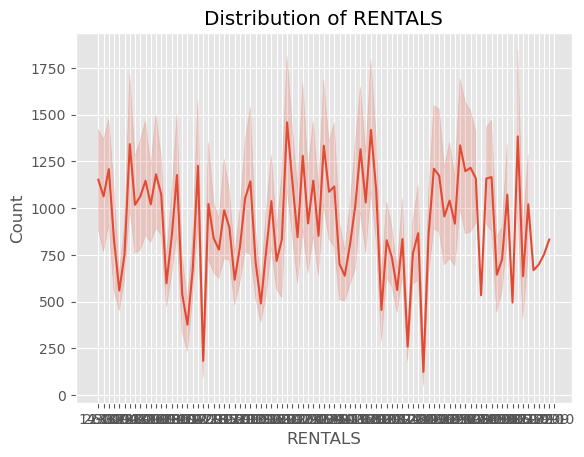

In [1188]:
sns.lineplot(data = df_full[df_full['FunctioningDay_Yes'] == True],
            x = 'Day_Month',
            y ='RENTALS')
# title and axis labels
plt.title(label   = "Distribution of RENTALS")
plt.xlabel(xlabel = "RENTALS") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [1189]:
#These new features capture the cyclical nature of the weekdays, ensuring that consecutive days are close 
#to each other in the feature space and that Sunday is close to Monday, 
#which wouldn't be captured if we simply treated the weekdays as ordinary categorical or numerical variables.

# Converting day of week into rad 
df_full['DayOfWeek_rad'] = (2 * np.pi * df_full['DayOfWeek']) / 7

# Creating cycle variables for each day of week 
df_full['DayOfWeek_sin'] = np.sin(df_full['DayOfWeek_rad'])
df_full['DayOfWeek_cos'] = np.cos(df_full['DayOfWeek_rad'])

In [1190]:
df_full = pd.get_dummies(df_full, columns=['DayOfWeek'], prefix='weekday', drop_first=True)


In [1191]:
## New feature: One of the most well-known formulas for calculating the heat index is the Steadman formula.
df_full['heatIndex'] = 0.5*(df_full['Temperature(F)'] + 61.0 + ((df_full['Temperature(F)']-68.0)*1.2)+(df_full['Humidity(%)']*0.094))


In [1192]:
#new feature indicating poor weather conditions based on visibility, rainfall, and snowfall

# Define thresholds
visibility_threshold = 7  
rainfall_threshold = 0.1

# Create 'PoorWeather' column based on the defined criteria
df_full['PoorWeather'] = ((df_full['Visibility(miles)'] <= visibility_threshold) |
                          (df_full['Rainfall(in)'] > rainfall_threshold) |
                          (df_full['Snowfall(in)'] > 0)).astype(int)


In [1193]:
# creating a (Pearson) correlation matrix
df_corr = df_full[(df_full['FunctioningDay_Yes'] == True) & (df_full['set'] == 'Not Kaggle')].corr(numeric_only = True).round(2)


# printing (Pearson) correlations with SalePrice
df_corr.loc[ : , ['RENTALS', 'log_RENTALS'] ].sort_values(by = 'RENTALS',
                                                                ascending = False)

,RENTALS,log_RENTALS
RENTALS,1.00,0.87
log_RENTALS,0.87,1.00
Hour,0.51,0.49
Temperature(F),0.44,0.34
heatIndex,0.41,0.31
has_SolarRadiation,0.39,0.36
log_SolarRadiation(MJ/m2),0.27,0.33
log_Wind speed (mph),0.25,0.20
Wind speed (mph),0.24,0.19
SolarRadiation(MJ/m2),0.24,0.31


In [1194]:
df_full = df_full.drop(columns=['DateHour', 'Year','Day_Month'])

In [1195]:
# subsetting for RENTALS
rental_corr = df_corr.loc[ : , ['RENTALS', 'log_RENTALS'] ].sort_values(by = 'RENTALS',
                                                                 ascending = False)
# removing irrelevant correlations
rental_corr = rental_corr.iloc[ 2: , : ]

# placeholder column for y-variable recommendation
rental_corr['original_v_log'] = 0

# filling in placeholder
for index, column in rental_corr.iterrows():
    
    # if RENTALS is higher
    if abs(rental_corr.loc[ index, 'RENTALS']) >  abs(rental_corr.loc[ index, 'log_RENTALS']):
        rental_corr.loc[ index , 'original_v_log'] = 'RENTALS'
        
        
    # if log_RENTALS is higher 
    elif abs(rental_corr.loc[ index, 'RENTALS']) <  abs(rental_corr.loc[ index, 'log_RENTALS']):
        rental_corr.loc[ index , 'original_v_log'] = 'log_RENTALS'
    
    
    # in case they are tied
    else:
        rental_corr.loc[ index , 'original_v_log'] = 'Tie'
        

# checking results
rental_corr["original_v_log"].value_counts(normalize = False,
                                       sort      = True,
                                       ascending = False).round(decimals = 2)

/var/folders/9f/z2_kx1s10h38gmr8x6sq4jb40000gn/T/ipykernel_72263/2610167133.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'RENTALS' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  rental_corr.loc[ index , 'original_v_log'] = 'RENTALS'


original_v_log
log_RENTALS    17
RENTALS        13
Tie             5
Name: count, dtype: int64

In [1196]:
df_full.head()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS,set,m_Visibility(miles),m_DewPointTemperature(F),m_SolarRadiation(MJ/m2),log_RENTALS,log_Wind speed (mph),log_Visibility(miles),log_Rainfall(in),log_SolarRadiation(MJ/m2),has_SolarRadiation,Holiday_No,Holiday_Yes,FunctioningDay_No,FunctioningDay_Yes,Month,Day,Hour,DayOfWeek_rad,DayOfWeek_sin,DayOfWeek_cos,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,heatIndex,PoorWeather
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,52,81,0.4,2.9,46.4,0.0,0.0,0.00,519.0,Not Kaggle,0,0,0,6.253829,0.336472,1.360977,0.0,0.000000,0,True,False,False,True,10,14,5,4.487990,-0.974928,-0.222521,False,False,False,False,True,False,50.707,1
mb_1330,51,53,2.2,11.7,35.2,0.0,0.0,1.01,1251.0,Not Kaggle,1,0,0,7.132498,1.163151,2.541602,0.0,0.698135,1,True,False,False,True,10,26,8,2.692794,0.433884,-0.900969,False,False,True,False,False,False,48.291,0
mb_551,56,49,2.5,3.4,38.8,0.0,0.0,0.00,1685.0,Not Kaggle,0,0,0,7.430114,1.252763,1.481605,0.0,0.000000,0,True,False,False,True,9,23,21,4.487990,-0.974928,-0.222521,False,False,False,False,True,False,53.603,1
mb_2103,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0.0,Not Kaggle,0,0,0,0.000000,2.379546,2.595255,0.0,1.211941,1,True,False,True,False,12,19,14,0.897598,0.781831,0.623490,True,False,False,False,False,False,67.104,0
mb_1430,53,20,2.9,10.8,12.9,0.0,0.0,1.96,814.0,Not Kaggle,0,0,0,6.703188,1.360977,2.468100,0.0,1.085189,1,True,False,False,True,10,30,12,0.000000,0.000000,1.000000,False,False,False,False,False,False,48.940,0


## Feature Engineering
Feature engineering aimed to enrich the dataset by introducing variables that encapsulate temporal and climatic nuances. The decomposition of the timestamp into day of the week and month variables was intended to capture weekly patterns and seasonal effects on rental demand. Additionally, the introduction of a binary weekend variable provided a straightforward delineation of weekdays from weekends, reflecting typical variations in usage. These engineered features were anticipated to enhance model interpretability and predictive capability by integrating domain knowledge into the analytical framework.

<br><h3>Standardization</h3>

In [1197]:
## Standardization ##

# preparing explanatory variable data
df_full_data   = df_full.drop(['RENTALS',
                               'log_RENTALS',
                                'set','FunctioningDay_No','FunctioningDay_Yes'],
                                axis = 1)


# preparing the target variable
df_full_target = df_full.loc[ : , ['RENTALS',
                               'log_RENTALS',
                                   'set','FunctioningDay_No','FunctioningDay_Yes']]

In [1198]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(df_full_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(df_full_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe(include = 'number').round(decimals = 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00
mean,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.44,-2.47,-1.62,-2.82,-3.14,-0.13,-0.11,-0.65,-0.19,-0.18,-0.23,-2.76,-5.05,-0.14,-0.72,-0.95,-4.15,-0.24,-1.08,-1.67,-1.66,-1.51,-1.37,-1.25,-0.41,-0.39,-0.41,-0.43,-0.41,-0.41,-2.51,-0.57
25%,-0.73,-0.82,-0.75,-0.61,-0.63,-0.13,-0.11,-0.65,-0.19,-0.18,-0.23,-0.66,-0.31,-0.14,-0.72,-0.95,0.24,-0.24,-1.08,-0.87,-0.83,-1.01,-1.09,-1.25,-0.41,-0.39,-0.41,-0.43,-0.41,-0.41,-0.75,-0.57
50%,-0.03,-0.01,-0.21,0.57,-0.00,-0.13,-0.11,-0.65,-0.19,-0.18,-0.23,0.01,0.55,-0.14,-0.72,-0.95,0.24,-0.24,-0.21,0.04,-0.00,-0.01,0.02,-0.30,-0.41,-0.39,-0.41,-0.43,-0.41,-0.41,-0.04,-0.57
75%,0.83,0.79,0.56,0.78,0.69,-0.13,-0.11,0.47,-0.19,-0.18,-0.23,0.71,0.67,-0.14,0.76,1.05,0.24,-0.24,0.66,0.84,0.83,0.99,1.14,0.88,-0.41,-0.39,-0.41,-0.43,-0.41,-0.41,0.78,-0.57
max,2.61,2.02,4.57,0.78,2.35,18.88,16.07,3.33,5.27,5.62,4.43,2.59,0.67,17.10,2.57,1.05,0.24,4.15,1.53,1.75,1.66,1.49,1.41,1.41,2.45,2.57,2.45,2.34,2.45,2.45,2.57,1.75


In [1199]:
# adding labels to the scaled DataFrame

#x_scaled_df = pd.DataFrame(x_scaled_df, index=df_full_data.index, columns=df_full_data.columns)
x_scaled_df.columns = df_full_data.columns
#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(df_full_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
Temperature(F)               165.346798
Humidity(%)                  349.023346
Wind speed (mph)               4.287674
Visibility(miles)             11.908498
DewPointTemperature(F)       197.448702
Rainfall(in)                   0.001395
Snowfall(in)                   0.000344
SolarRadiation(MJ/m2)          0.638650
m_Visibility(miles)            0.033588
m_DewPointTemperature(F)       0.029737
m_SolarRadiation(MJ/m2)        0.046179
log_Wind speed (mph)           0.240506
log_Visibility(miles)          0.205704
log_Rainfall(in)               0.000969
log_SolarRadiation(MJ/m2)      0.188911
has_SolarRadiation             0.249389
Holiday_No                     0.051926
Holiday_Yes                    0.051926
Month                          1.326610
Day                           76.778347
Hour                          47.906593
DayOfWeek_rad                  3.222691
DayOfWeek_sin                  0.491372
DayOfWeek_cos                  0.

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [1200]:
x_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature(F)             2184 non-null   float64
 1   Humidity(%)                2184 non-null   float64
 2   Wind speed (mph)           2184 non-null   float64
 3   Visibility(miles)          2184 non-null   float64
 4   DewPointTemperature(F)     2184 non-null   float64
 5   Rainfall(in)               2184 non-null   float64
 6   Snowfall(in)               2184 non-null   float64
 7   SolarRadiation(MJ/m2)      2184 non-null   float64
 8   m_Visibility(miles)        2184 non-null   float64
 9   m_DewPointTemperature(F)   2184 non-null   float64
 10  m_SolarRadiation(MJ/m2)    2184 non-null   float64
 11  log_Wind speed (mph)       2184 non-null   float64
 12  log_Visibility(miles)      2184 non-null   float64
 13  log_Rainfall(in)           2184 non-null   float

In [1201]:
df_full_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RENTALS             1638 non-null   float64
 1   log_RENTALS         1638 non-null   float64
 2   set                 2184 non-null   object 
 3   FunctioningDay_No   2184 non-null   bool   
 4   FunctioningDay_Yes  2184 non-null   bool   
dtypes: bool(2), float64(2), object(1)
memory usage: 137.1+ KB


In [1202]:
x_scaled_df.index = df_full_target.index

In [1203]:
df_full = pd.concat([x_scaled_df, df_full_target], axis=1)

In [1204]:
df_full = df_full.rename(columns={
    'Temperature(F)': 'Temperature_F',
    'Humidity(%)': 'Humidity',
    'Wind speed (mph)': 'Wind_speed',
    'Visibility(miles)': 'Visibility',
    'DewPointTemperature(F)': 'DewPointTemperature',
    'Rainfall(in)': 'Rainfall',
    'Snowfall(in)': 'Snowfall',
    'SolarRadiation(MJ/m2)': 'SolarRadiation',
    'm_Visibility(miles)': 'm_Visibility',
    'm_DewPointTemperature(F)': 'm_m_DewPointTemperature',
    'm_SolarRadiation(MJ/m2)': 'm_SolarRadiation',
    'log_Wind speed (mph)': 'log_Wind_speed',
    'log_Visibility(miles)': 'log_Visibility',
    'log_Rainfall(in)': 'log_Rainfall',
    'log_SolarRadiation(MJ/m2)': 'log_SolarRadiation'
    
})


In [1205]:
df_train_1 = df_full[ (df_full['set'] == 'Not Kaggle') & (df_full['FunctioningDay_Yes'] == True)]


In [1206]:
# making a copy of housing
df_full_explanatory = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping SalePrice and Order from the explanatory variable set
df_full_explanatory = df_full_explanatory.drop([
                                 'RENTALS',
                                 'log_RENTALS',
                                 'set'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in df_full_explanatory:
    print(val,"+")

Temperature_F +
Humidity +
Wind_speed +
Visibility +
DewPointTemperature +
Rainfall +
Snowfall +
SolarRadiation +
m_Visibility +
m_m_DewPointTemperature +
m_SolarRadiation +
log_Wind_speed +
log_Visibility +
log_Rainfall +
log_SolarRadiation +
has_SolarRadiation +
Holiday_No +
Holiday_Yes +
Month +
Day +
Hour +
DayOfWeek_rad +
DayOfWeek_sin +
DayOfWeek_cos +
weekday_1 +
weekday_2 +
weekday_3 +
weekday_4 +
weekday_5 +
weekday_6 +
heatIndex +
PoorWeather +
FunctioningDay_No +
FunctioningDay_Yes +


In [1207]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """RENTALS ~ Temperature_F +
Humidity +
Rainfall +
SolarRadiation +
m_Visibility +
m_SolarRadiation +
log_Rainfall +
log_SolarRadiation +
has_SolarRadiation +
Holiday_No +
Holiday_Yes +
FunctioningDay_No +
FunctioningDay_Yes +
Month +
Hour +
DayOfWeek_rad +
weekday_2 +
weekday_5 +
heatIndex """,
                               data = df_train_1)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RENTALS   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     142.0
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          1.06e-270
Time:                        23:44:02   Log-Likelihood:                -10768.
No. Observations:                1455   AIC:                         2.157e+04
Df Residuals:                    1439   BIC:                         2.165e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    469.2318      5.260     89.209      0.000     458.914     479.550
FunctioningDay_No[T.True]  -1.147e-12   2.16e-13     -5.322      0.000   -1.57e-12   -7.24e-13
FunctioningDay_Yes[T.True]   469.2318      5.260     89.209      0.000     458.914     479.550
Temperature_F                120.1941      6.449     18.637      0.000     107.543     132.845
Humidity                    -205.8790     14.398    -14.300      0.000    -234.121    -177.637
Rainfall                    1022.1854    222.807      4.588      0.000     585.124    1459.247
SolarRadiation               198.2636     83.527      2.374      0.018      34.415     362.112
m_Visibility                 -24.4050     10.699     -2.281      0.023     -45.393      -3.417
m_SolarRadiation              30.4003     11.274      2.696      0.007       8.285      52.516
log_Rainfall               -1110.9010    216.947     -5.121      0.000   -1536.467    -685.335
log_SolarRadiation          -498.9198     92.735     -5.380      0.000    -680.829    -317.010
has_SolarRadiation           329.3056     20.226     16.281      0.000     289.630     368.981
Holiday_No                    14.3593      5.869      2.447      0.015       2.847      25.872
Holiday_Yes                  -14.3593      5.869     -2.447      0.015     -25.872      -2.847
Month                        -13.4300     12.002     -1.119      0.263     -36.972      10.112
Hour                         203.9162     11.385     17.911      0.000     181.583     226.250
DayOfWeek_rad                 35.2174     11.925      2.953      0.003      11.826      58.609
weekday_2                     39.7313     11.540      3.443      0.001      17.094      62.369
weekday_5                     26.7258     11.354      2.354      0.019       4.453      48.999
heatIndex                    107.9431      6.335     17.040      0.000      95.517     120.369
==============================================================================
Omnibus:                       98.571   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.657
Skew:                           0.595   Prob(JB):                     7.00e-29
Kurtosis:                       3.849   Cond. No.                     1.18e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.83e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Data Partitioning</h2><br>
This is a very important step for your submission on Kaggle. Make sure to complete your data preparationbefore moving forward.
<br>
<br><h3>Separating the Kaggle Data</h3><br>

In [1208]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

In [1209]:
df = df[ df['FunctioningDay_Yes'] == True ].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, mb_1039 to mb_1747
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature_F            1455 non-null   float64
 1   Humidity                 1455 non-null   float64
 2   Wind_speed               1455 non-null   float64
 3   Visibility               1455 non-null   float64
 4   DewPointTemperature      1455 non-null   float64
 5   Rainfall                 1455 non-null   float64
 6   Snowfall                 1455 non-null   float64
 7   SolarRadiation           1455 non-null   float64
 8   m_Visibility             1455 non-null   float64
 9   m_m_DewPointTemperature  1455 non-null   float64
 10  m_SolarRadiation         1455 non-null   float64
 11  log_Wind_speed           1455 non-null   float64
 12  log_Visibility           1455 non-null   float64
 13  log_Rainfall             1455 non-null   float64
 14  log_SolarRadiation  

<br><h3>Train-Test Split</h3><br>
Note that the following code will remove non-numeric features, keeping only integer and float data types. It will also remove any observations that contain missing values. This is to prevent errors in the model building process. 

In [1210]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = ['Temperature_F', 
              'Humidity',
              'Visibility', 
              'DewPointTemperature', 
              'Rainfall',
              'log_Wind_speed', 
              'log_SolarRadiation', 
              'has_SolarRadiation',
              'Month', 'Day', 
              'Hour', 
              'heatIndex',
              'RENTALS', ] 
# this should be a list



## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# removing non-numeric columns and missing values
df = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 0)


# prepping data for train-test split
x_data = df.drop(labels = y_variable,
                 axis   = 1)

y_data = df[y_variable]


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1455
Features  (Columns): 13


Training Data (X-side)
----------------------
Observations (Rows): 1091
Features  (Columns): 12


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1091


Testing Data (X-side)
---------------------
Observations (Rows): 364
Features  (Columns): 12


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 364


## Candidate Model Development and Final Model Selection

The development phase encompassed the training and evaluation of multiple regression models, including OLS Linear Regression, Lasso, Ridge, Elastic Net, K-Nearest Neighbors, and Decision Tree Regressor. Each model was assessed based R-squared values, with a keen focus on balancing predictive accuracy and model complexity. Hyperparameter tuning, conducted on the top-performing models, further refined their configurations to optimize performance. The final model selection was guided by a holistic consideration of error metrics, computational efficiency, and the interpretability of results. The chosen model not only excelled in forecasting daily rentals but also provided actionable insights into the influence of various predictors, aligning with the project's objective of informing strategic decision-making.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Candidate Modeling</h2><br>
Develop your candidate models below.

In [1211]:
## Candidate Modeling ##

#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
# naming the model
model_name = "Linear_Regression" # name your model

# model type
model = sklearn.linear_model.LinearRegression() # model type ( ex: sklearn.linear_model.LinearRegression() )



## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Linear_Regression
Train_Score:    0.5681
Test_Score:     0.5948
Train-Test Gap: 0.0267



In [1239]:
## Candidate Modeling ##

#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
# naming the model
model_name = "KNN" # name your model

# model type
model = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = 4) # model type ( ex: sklearn.linear_model.LinearRegression() )



## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     KNN
Train_Score:    0.8006
Test_Score:     0.6974
Train-Test Gap: 0.1032



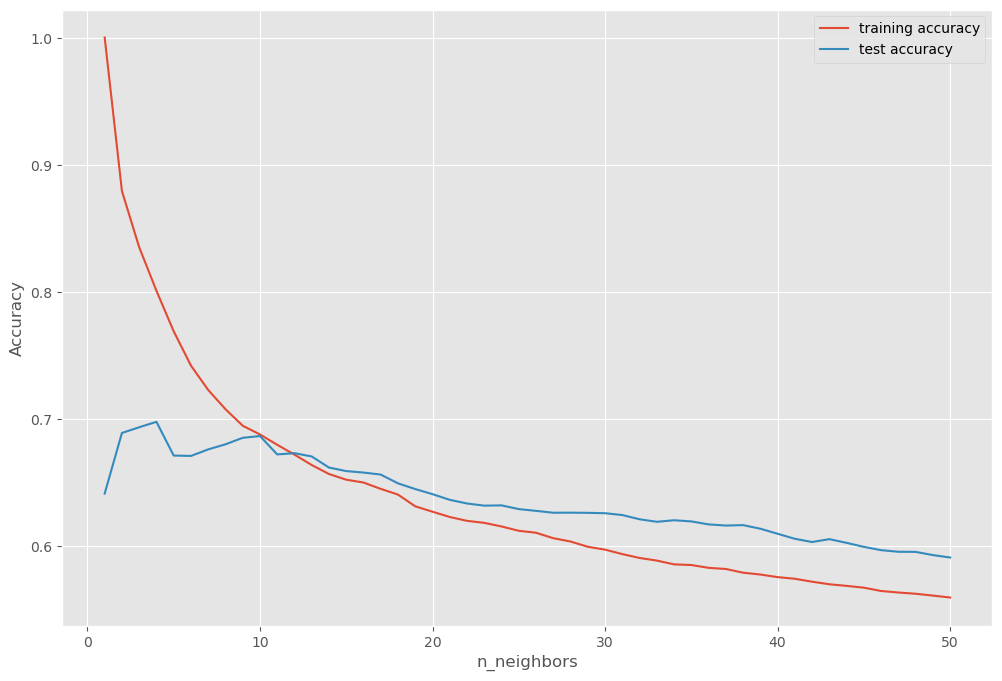

In [1213]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [1214]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 4


In [1215]:
## Candidate Modeling ##

#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
# naming the model
model_name = "Lasso (scaled)" # name your model

# model type
model = sklearn.linear_model.Lasso(alpha       = 10.0,
                                  random_state = 702) # model type ( ex: sklearn.linear_model.LinearRegression() )



## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Lasso (scaled)
Train_Score:    0.5602
Test_Score:     0.586
Train-Test Gap: 0.0258



In [1216]:
## Candidate Modeling ##

#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
# naming the model
model_name = "Ridge (scaled)" # name your model

# model type
model = sklearn.linear_model.Ridge(alpha = 10.0,
                                   random_state = 702) # model type ( ex: sklearn.linear_model.LinearRegression() )



## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Ridge (scaled)
Train_Score:    0.5678
Test_Score:     0.595
Train-Test Gap: 0.0272



In [1217]:
## Candidate Modeling ##

#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
# naming the model
model_name = "Elastic Net (scaled) with MSE" # name your model

# model type
model = sklearn.linear_model.SGDRegressor(alpha = 0.5,
                                          penalty = 'elasticnet',
                                         random_state = 702) # model type ( ex: sklearn.linear_model.LinearRegression() )



## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Elastic Net (scaled) with MSE
Train_Score:    0.5048
Test_Score:     0.531
Train-Test Gap: 0.0262



In [1218]:
## Candidate Modeling ##

#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
# naming the model
model_name = "Pruned Regression Tree" # name your model

# model type
model = DecisionTreeRegressor(max_depth = 4,
                              min_samples_leaf = 25,
                              random_state = 702) # model type ( ex: sklearn.linear_model.LinearRegression() )



## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Pruned Regression Tree
Train_Score:    0.6138
Test_Score:     0.6222
Train-Test Gap: 0.0084



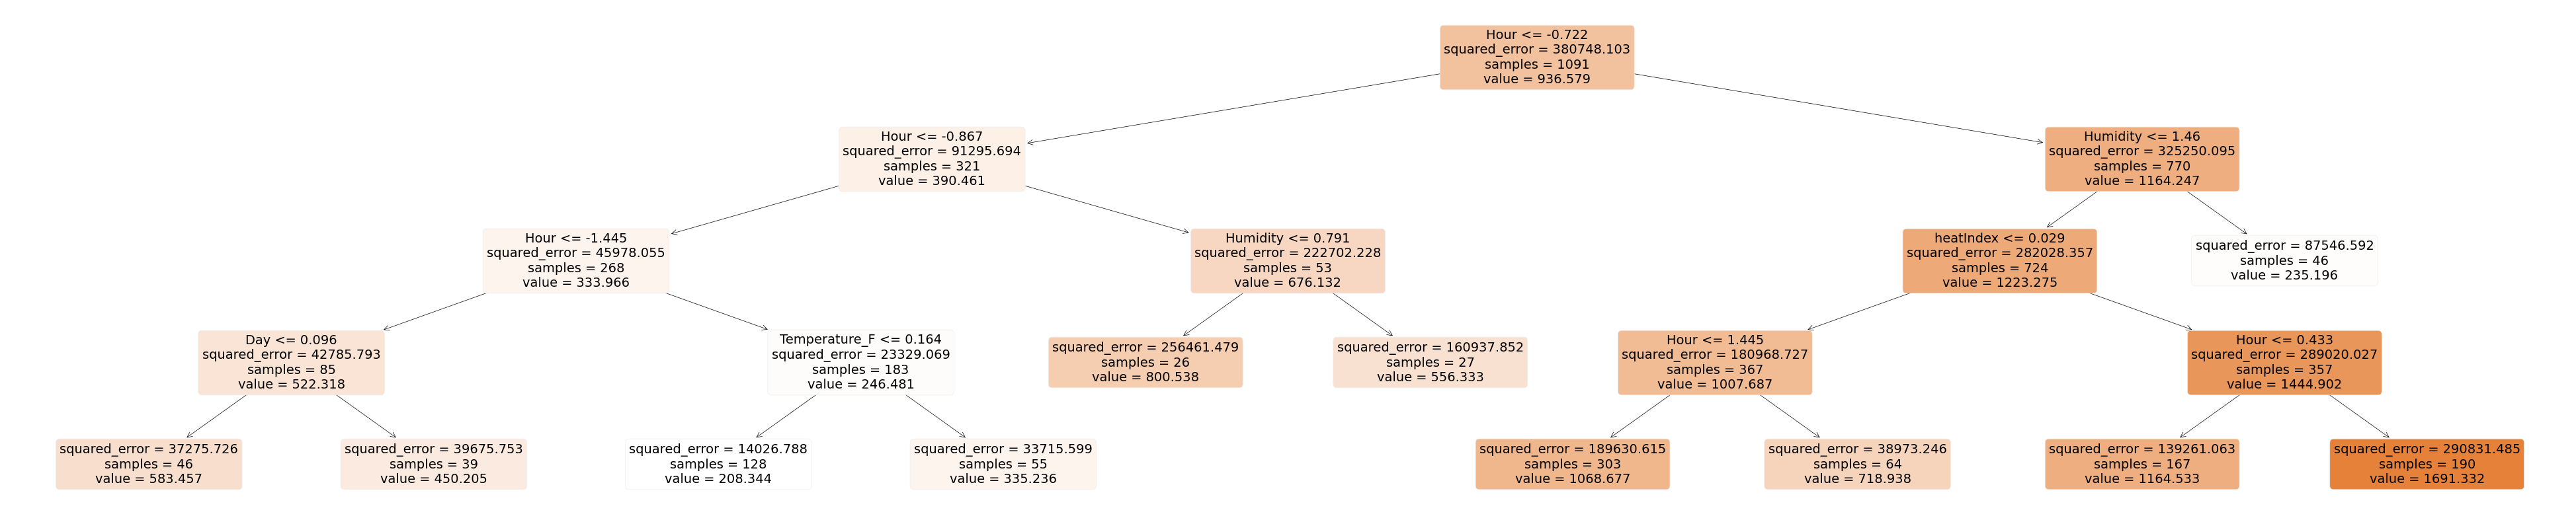

In [1219]:
# setting figure size
plt.figure(figsize=(50, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = list(x_train.columns),
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [1220]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

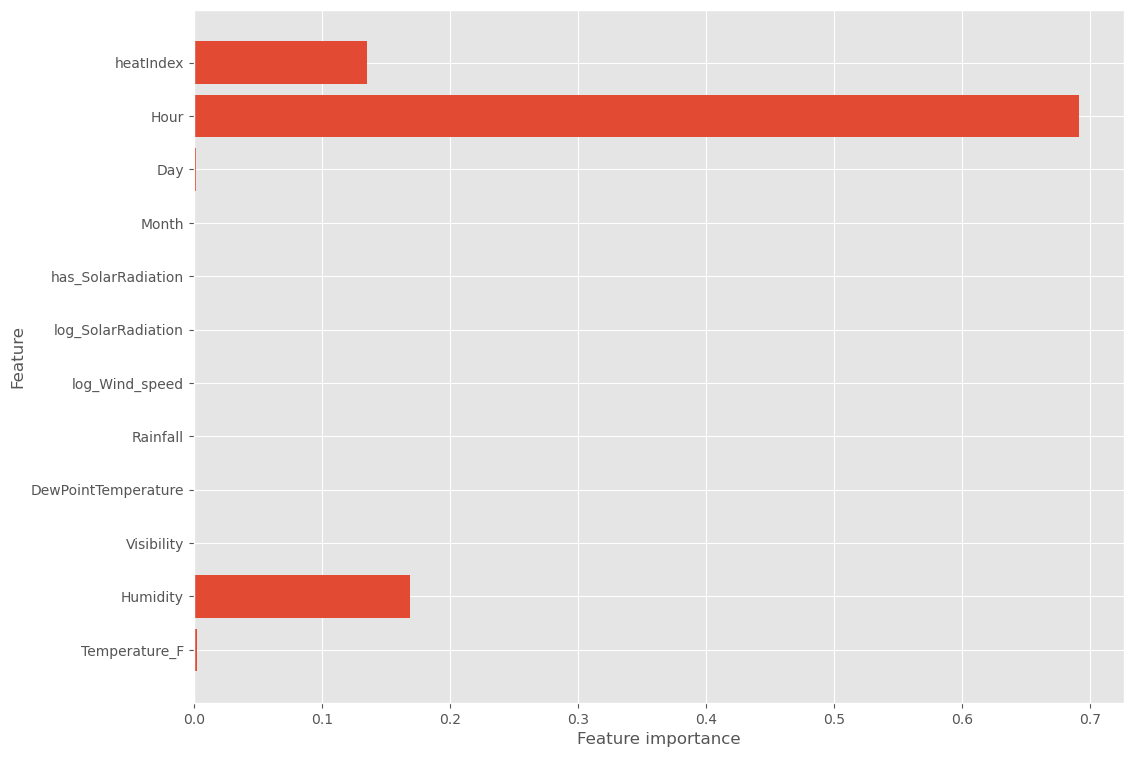

In [1221]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

<br>
<h3>Residual Analysis</h3><br>

In [1222]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)


#!###########################!#
#!# add more code as needed #!#
#!###########################!#



,True,Predicted
ID,,
mb_938,806.0,583.456522
mb_1332,1030.0,1164.532934
mb_1658,430.0,583.456522
mb_821,165.0,208.343750
mb_1892,2543.0,1691.331579


<br>
<h3>Hyperparameter Tuning</h3><br>

In [1241]:
## Hyperparameter Tuning ##
# declaring a hyperparameter space
criterion_range = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter_range  = ["beast", "random"]
depth_range     = np.arange(1,11,1)
leaf_range      = np.arange(1,251,5)


# creating a hyperparameter grid
param_grid = {'criterion'      : criterion_range,
             'splitter'        : splitter_range,
             'max_depth'       : depth_range,
             'min_samples_leaf': leaf_range}
              


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeRegressor()


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree, #model
                                   param_distributions   = param_grid, #hyperparameter ranges
                                   cv                    = 5,    #folds
                                   n_iter                = 1000, #how many models to build
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_train, y_train)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))


Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 6, 'max_depth': 9, 'criterion': 'squared_error'}
Tuned Training AUC: 0.6467


/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2455 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2455 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    valid

In [1242]:
# naming the model
model_name = 'Tuned Tree'


# INSTANTIATING a logistic regression model with tuned values
model = DecisionTreeRegressor(splitter         = 'random',
                              min_samples_leaf = 6,
                              max_depth        = 9,
                              criterion        = 'squared_error')


# FITTING to the TRAINING data
model.fit(x_train, y_train)


# PREDICTING based on the testing set
model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7402
Testing Score  : 0.6542
Train-Test Gap : 0.086


In [1243]:
## Hyperparameter Tuning ##
# declaring a hyperparameter space
n_neighbors = np.arange(1, 31)
weights     = ['uniform', 'distance']
algorithm   = ['ball_tree', 'kd_tree', 'brute', 'auto']
leaf_size   = np.arange(1, 50)
p_size      = [1, 2]


# creating a hyperparameter grid
param_grid = {
            'n_neighbors': n_neighbors, 
            'weights': weights,
            'algorithm': algorithm,
            'leaf_size': leaf_size,  
            'p': p_size 
}
              


# INSTANTIATING the model object without hyperparameters
tuned_knn = KNeighborsRegressor()


# RandomizedSearchCV object
tuned_knn_cv = RandomizedSearchCV(estimator             = tuned_knn, #model
                                   param_distributions   = param_grid, #hyperparameter ranges
                                   cv                    = 5,    #folds
                                   n_iter                = 1000, #how many models to build
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_knn_cv.fit(x_train, y_train)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_knn_cv.best_params_)
print("Tuned Training AUC:", tuned_knn_cv.best_score_.round(4))

Tuned Parameters  : {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'leaf_size': 4, 'algorithm': 'kd_tree'}
Tuned Training AUC: 0.6748


In [1268]:
# naming the model
model_name = 'Tuned KNN'


# INSTANTIATING a logistic regression model with tuned values
model = KNeighborsRegressor(weights = 'distance',
                            p = 1,
                              n_neighbors        = 5,
                              leaf_size        = 4,
                           algorithm = 'kd_tree')


# FITTING to the TRAINING data
model.fit(x_train, y_train)


# PREDICTING based on the testing set
model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 1.0
Testing Score  : 0.7451
Train-Test Gap : 0.2549


In [1251]:
## Hyperparameter Tuning ##
# declaring a hyperparameter space
alpha = np.logspace(-4, 4, 200)
max_iter     = [1000, 5000, 10000]
selection   = ['cyclic', 'random']


# creating a hyperparameter grid
param_grid = {
            'alpha': alpha, 
            'max_iter': max_iter,
            'selection': selection,
             
}
              


# INSTANTIATING the model object without hyperparameters
tuned_Lasso = sklearn.linear_model.Lasso()


# RandomizedSearchCV object
tuned_Lasso_cv = RandomizedSearchCV(estimator             = tuned_Lasso, #model
                                   param_distributions   = param_grid, #hyperparameter ranges
                                   cv                    = 5,    #folds
                                   n_iter                = 1000, #how many models to build
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_Lasso_cv.fit(x_train, y_train)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_Lasso_cv.best_params_)
print("Tuned Training AUC:", tuned_Lasso_cv.best_score_.round(4))

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+07, tolerance: 3.292e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.674e+06, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+07, tolerance: 3.292e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+07, tolerance: 3.435e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.198e+07, tolerance: 3.435e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+07, tolerance: 3.292e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+07, tolerance: 3.435e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+07, tolerance: 3.292e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+07, tolerance: 3.292e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+07, tolerance: 3.435e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+07, tolerance: 3.435e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+07, tolerance: 3.292e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.285e+05, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.132e+07, tolerance: 3.292e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+07, tolerance: 3.435e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.833e+06, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+06, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+07, tolerance: 3.435e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+07, tolerance: 3.435e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+07, tolerance: 3.435e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.237e+05, tolerance: 3.194e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+07, tolerance: 3.323e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+07, tolerance: 3.367e+04
  model = cd_fast.enet_coordinate_descent(
/Users/jorgeluissolis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

Tuned Parameters  : {'selection': 'random', 'max_iter': 5000, 'alpha': 2.643081486974108}
Tuned Training AUC: 0.5471


In [1254]:
# naming the model
model_name = 'Tuned Lasso'


# INSTANTIATING a logistic regression model with tuned values
model = sklearn.linear_model.Lasso(selection = 'random',
                                  max_iter = 5000,
                                  alpha = 2.64)


# FITTING to the TRAINING data
model.fit(x_train, y_train)


# PREDICTING based on the testing set
model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.5676
Testing Score  : 0.5942
Train-Test Gap : 0.0266


In [1255]:
## Hyperparameter Tuning ##
# declaring a hyperparameter space
alpha = np.logspace(-6, 6, 200)
solver     = ['svd', 'cholesky', 'lsqr', 'sag', 'saga']
max_iter   = [None, 1000, 5000, 10000]


# creating a hyperparameter grid
param_grid = {
            'alpha': alpha, 
            'solver': solver,
            'max_iter': max_iter,
             
}
              


# INSTANTIATING the model object without hyperparameters
tuned_Ridge = sklearn.linear_model.Ridge()


# RandomizedSearchCV object
tuned_Ridge_cv = RandomizedSearchCV(estimator             = tuned_Ridge, #model
                                   param_distributions   = param_grid, #hyperparameter ranges
                                   cv                    = 5,    #folds
                                   n_iter                = 1000, #how many models to build
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_Ridge_cv.fit(x_train, y_train)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_Ridge_cv.best_params_)
print("Tuned Training AUC:", tuned_Ridge_cv.best_score_.round(4))

Tuned Parameters  : {'solver': 'cholesky', 'max_iter': 1000, 'alpha': 8.603464416684492}
Tuned Training AUC: 0.5472


In [1256]:
# naming the model
model_name = 'Tuned Ridge'


# INSTANTIATING a logistic regression model with tuned values
model = sklearn.linear_model.Ridge(solver = 'cholesky',
                                  max_iter = 1000,
                                  alpha = 8.603464416684492)


# FITTING to the TRAINING data
model.fit(x_train, y_train)


# PREDICTING based on the testing set
model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.5679
Testing Score  : 0.5951
Train-Test Gap : 0.0272


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Preparing Submission File for Kaggle</h2><br>
The code below will store the predicted values for each of the models above.

In [1225]:
kaggle_df

,Temperature_F,Humidity,Visibility,DewPointTemperature,Rainfall,log_Wind_speed,log_SolarRadiation,has_SolarRadiation,Month,Day,Hour,heatIndex,RENTALS
ID,,,,,,,,,,,,,
mb_382,1.213989,0.576567,0.023644,1.692701,-0.130085,1.084613,-0.717111,-0.951714,-1.077321,0.038773,1.227999,1.255941,NaN
mb_547,0.436307,-1.082769,-2.091765,-0.207432,-0.130085,-0.391524,-0.278539,1.050736,-1.077321,0.837648,0.794564,0.370910,NaN
mb_578,0.902916,-0.279865,-0.324094,0.475762,-0.130085,-2.391524,-0.717111,-0.951714,-1.077321,1.065898,-1.661566,0.889908,NaN
mb_187,0.902916,-0.868662,-1.019571,0.354780,-0.130085,0.518496,-0.185378,1.050736,-1.077321,-0.874226,0.794564,0.853177,NaN
mb_227,1.369525,0.737148,0.748099,1.585952,-0.130085,1.451227,2.015833,1.050736,-1.077321,-0.645977,-0.361262,1.422262,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
mb_729,0.747380,-0.333392,-2.149721,0.319197,-0.130085,0.113837,0.215767,1.050736,-0.209104,-1.673101,-0.650218,0.730265,NaN
mb_767,-0.574680,-0.226338,0.777078,-0.677128,-0.130085,0.348474,-0.717111,-0.951714,-0.209104,-1.558976,1.372477,-0.591633,NaN
mb_267,-0.963521,0.148351,0.777078,-0.541913,-0.130085,-2.077197,-0.717111,-0.951714,-1.077321,-0.417727,-1.517087,-0.959016,NaN


In [1269]:
# removing non-numeric columns and missing values
kaggle_df = kaggle_data[x_features].copy()


# x-data
x_data_kaggle = kaggle_df.drop(labels = y_variable,
                               axis   = 1)

# y-data
y_data_kaggle = kaggle_df[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

In [1270]:
kaggle_df

,Temperature_F,Humidity,Visibility,DewPointTemperature,Rainfall,log_Wind_speed,log_SolarRadiation,has_SolarRadiation,Month,Day,Hour,heatIndex,RENTALS
ID,,,,,,,,,,,,,
mb_382,1.213989,0.576567,0.023644,1.692701,-0.130085,1.084613,-0.717111,-0.951714,-1.077321,0.038773,1.227999,1.255941,NaN
mb_547,0.436307,-1.082769,-2.091765,-0.207432,-0.130085,-0.391524,-0.278539,1.050736,-1.077321,0.837648,0.794564,0.370910,NaN
mb_578,0.902916,-0.279865,-0.324094,0.475762,-0.130085,-2.391524,-0.717111,-0.951714,-1.077321,1.065898,-1.661566,0.889908,NaN
mb_187,0.902916,-0.868662,-1.019571,0.354780,-0.130085,0.518496,-0.185378,1.050736,-1.077321,-0.874226,0.794564,0.853177,NaN
mb_227,1.369525,0.737148,0.748099,1.585952,-0.130085,1.451227,2.015833,1.050736,-1.077321,-0.645977,-0.361262,1.422262,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
mb_729,0.747380,-0.333392,-2.149721,0.319197,-0.130085,0.113837,0.215767,1.050736,-0.209104,-1.673101,-0.650218,0.730265,NaN
mb_767,-0.574680,-0.226338,0.777078,-0.677128,-0.130085,0.348474,-0.717111,-0.951714,-0.209104,-1.558976,1.372477,-0.591633,NaN
mb_267,-0.963521,0.148351,0.777078,-0.541913,-0.130085,-2.077197,-0.717111,-0.951714,-1.077321,-0.417727,-1.517087,-0.959016,NaN


<br>
<h3>Creating the Kaggle File</h3><br>

In [1271]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)


model_pred_df.head()

,RENTALS
ID,
mb_382,1517.387712
mb_547,2007.009596
mb_578,467.893076
mb_187,1826.028755
mb_227,1011.441540


In [1272]:
# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test_2 = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')
df_test_2.head()

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay
ID,,,,,,,,,,,
mb_382,2023-09-16 20:59:58.095000,73,70,5.6,9.8,65.7,0.0,0.0,0.00,No,Yes
mb_547,2023-09-23 17:59:57.270000,63,39,2.2,2.5,39.0,0.0,0.0,0.21,No,Yes
mb_578,2023-09-25 00:59:57.115000,69,54,0.2,8.6,48.6,0.0,0.0,0.00,No,Yes
mb_187,2023-09-08 17:59:59.070000,69,43,4.0,6.2,46.9,0.0,0.0,0.26,Yes,Yes
mb_227,2023-09-10 09:59:58.870000,75,73,6.9,12.3,64.2,0.0,0.0,2.28,No,Yes


In [1273]:
model_pred_df['FunctioningDay'] = df_test_2['FunctioningDay'].values
model_pred_df.head()

,RENTALS,FunctioningDay
ID,,
mb_382,1517.387712,Yes
mb_547,2007.009596,Yes
mb_578,467.893076,Yes
mb_187,1826.028755,Yes
mb_227,1011.441540,Yes


In [1274]:
model_pred_df.loc[model_pred_df['FunctioningDay'] == 'No', 'RENTALS'] = 0
model_pred_df.head()

,RENTALS,FunctioningDay
ID,,
mb_382,1517.387712,Yes
mb_547,2007.009596,Yes
mb_578,467.893076,Yes
mb_187,1826.028755,Yes
mb_227,1011.441540,Yes


In [1275]:
model_pred_df = model_pred_df.drop('FunctioningDay', axis=1)
model_pred_df.head()

,RENTALS
ID,
mb_382,1517.387712
mb_547,2007.009596
mb_578,467.893076
mb_187,1826.028755
mb_227,1011.441540


In [1276]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# sending predictions to .csv
model_pred_df.to_csv(path_or_buf = "./model_output/Solis_Jorge_A1_v3.csv",
                     index       = True,
                     index_label = 'ID')

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~

  _    _                           __  __           _      _ _             _ 
 | |  | |                         |  \/  |         | |    | (_)           | |
 | |__| | __ _ _ __  _ __  _   _  | \  / | ___   __| | ___| |_ _ __   __ _| |
 |  __  |/ _` | '_ \| '_ \| | | | | |\/| |/ _ \ / _` |/ _ \ | | '_ \ / _` | |
 | |  | | (_| | |_) | |_) | |_| | | |  | | (_) | (_| |  __/ | | | | | (_| |_|
 |_|  |_|\__,_| .__/| .__/ \__, | |_|  |_|\___/ \__,_|\___|_|_|_| |_|\__, (_)
              | |   | |     __/ |                                     __/ |  
              |_|   |_|    |___/                                     |___/   

                                                            

~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>